#  Business Case: Rental Bike Sharing EDA &  Hypothesis Testing

## Problem Statement

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("bike_sharing.CSV")

In [ ]:
data

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [ ]:
data.shape

(10886, 12)

For the Given Sample it has 10886 Records and 12 features

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

(**'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'**) This are the 12 Features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

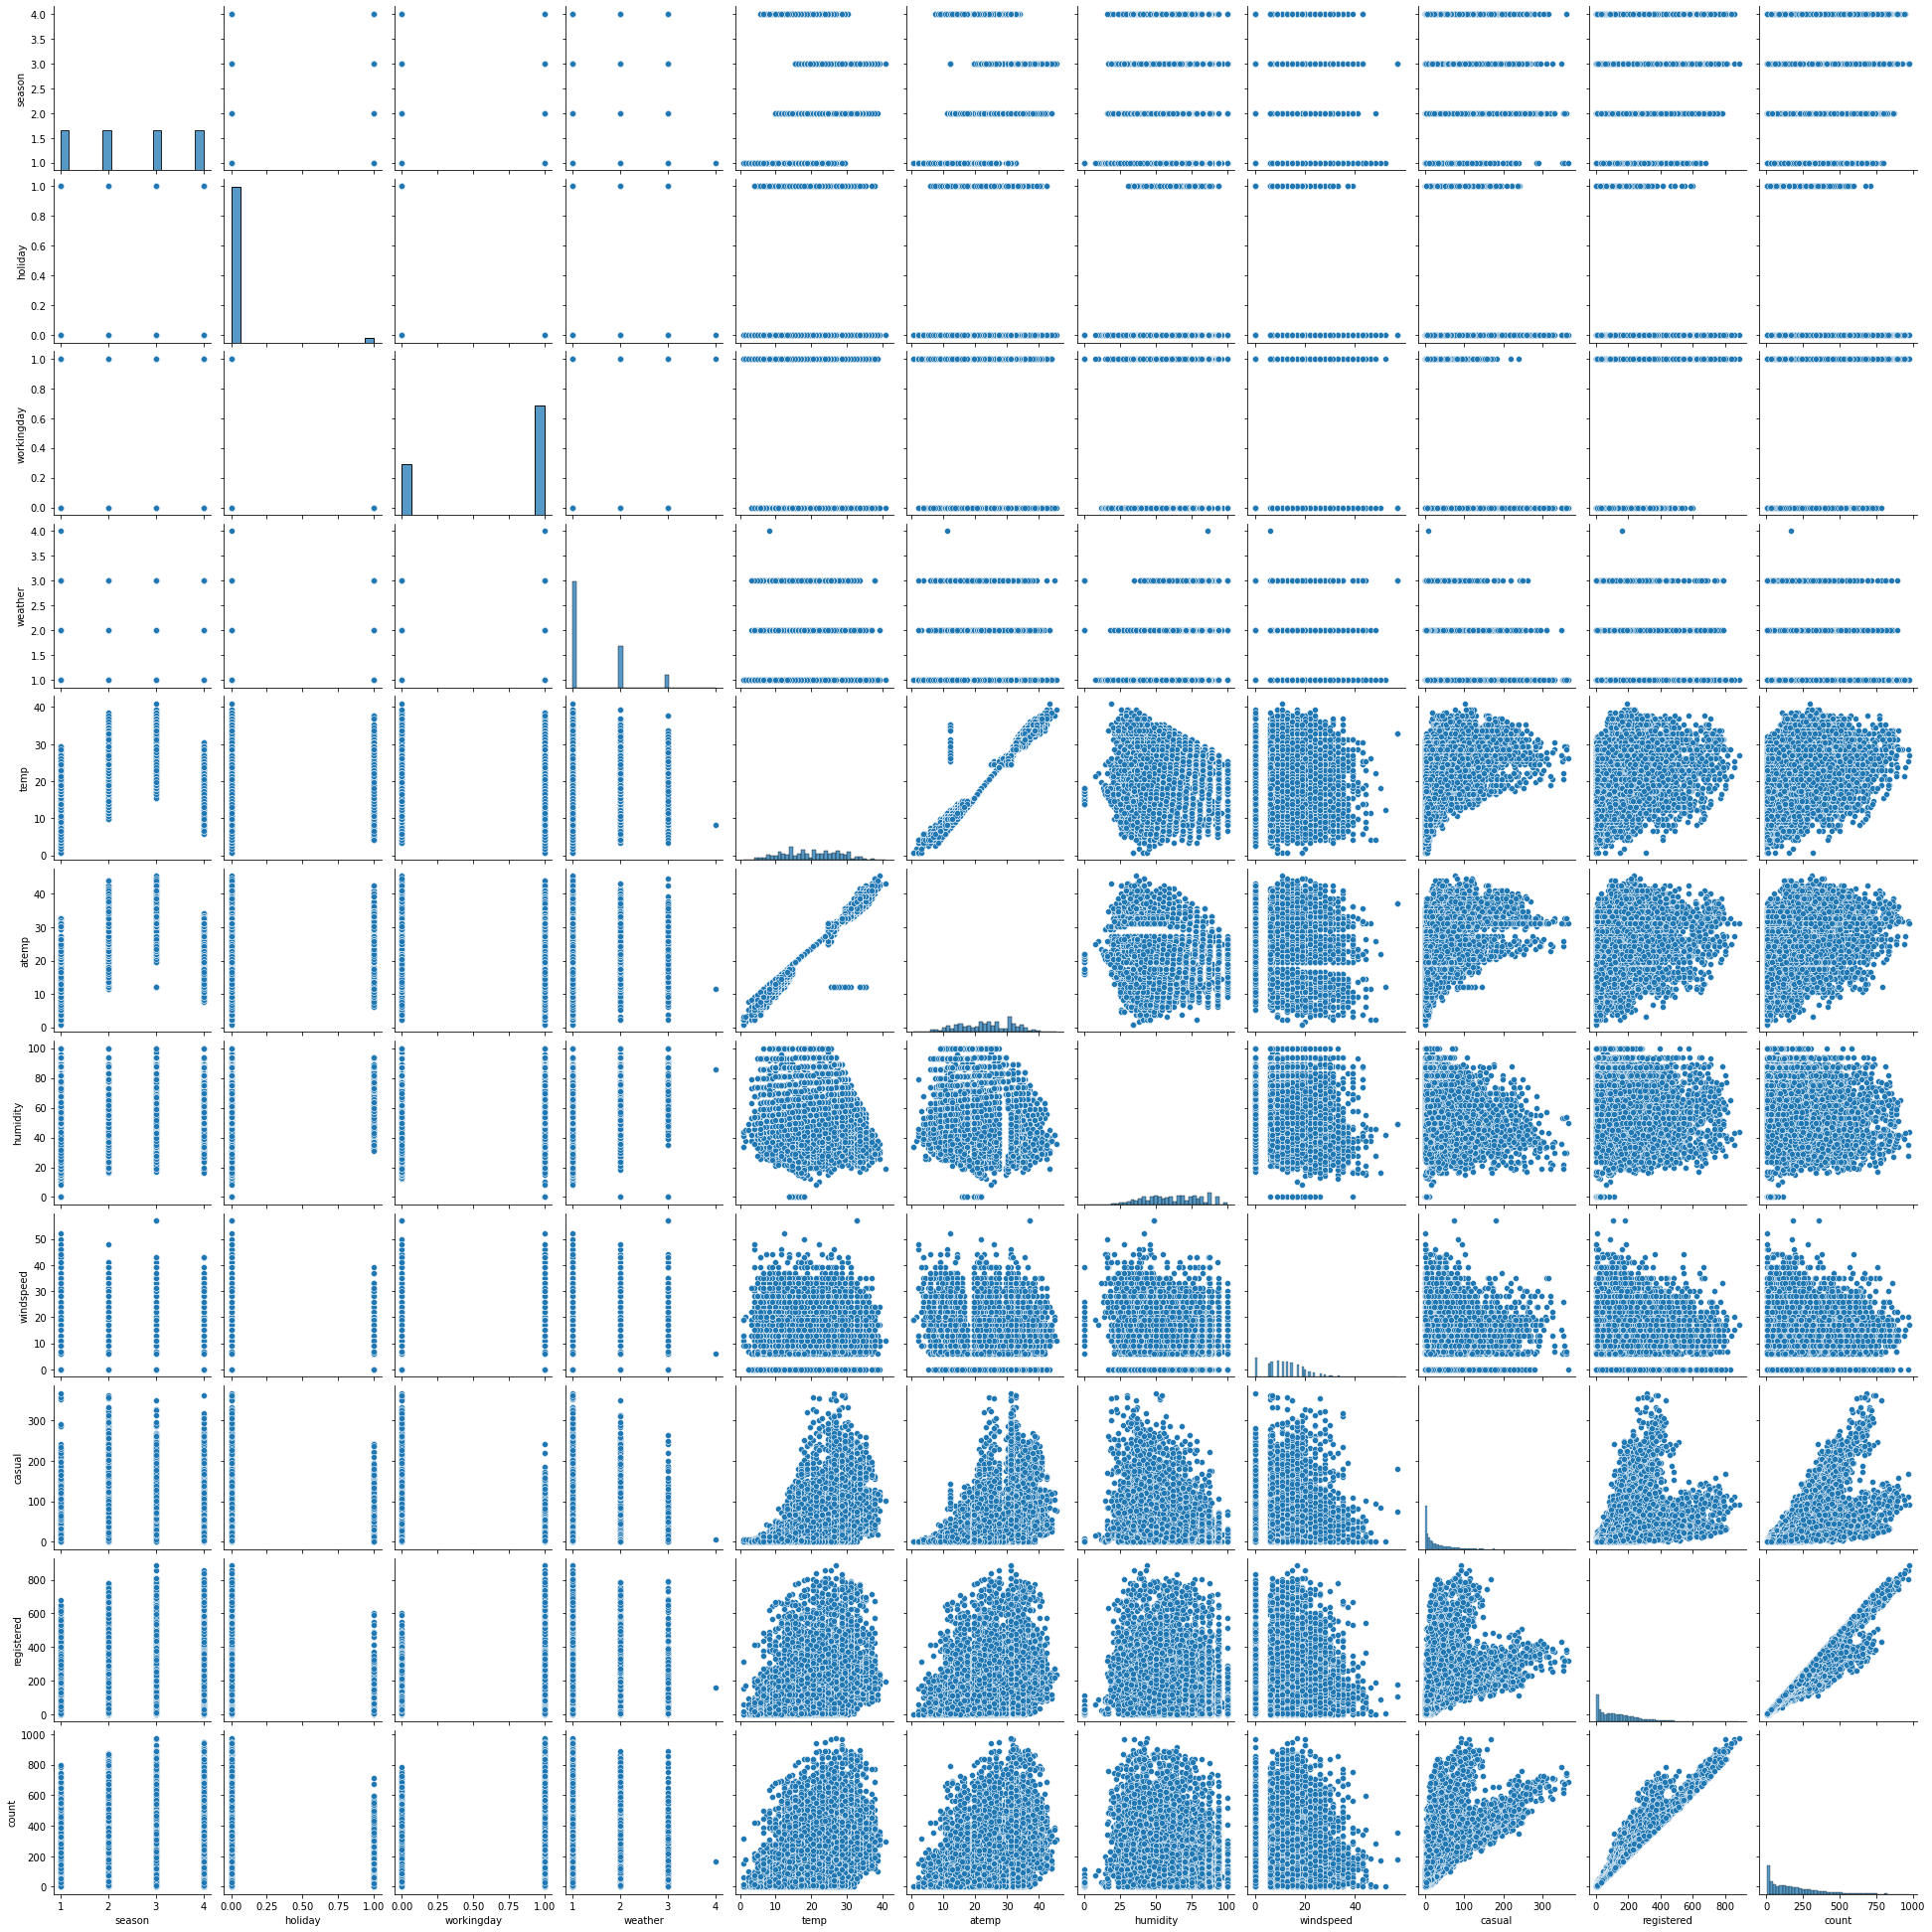

In [ ]:
sns.pairplot(data)

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are No null values present in the given dataset

In [ ]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

After Converting String Datetime column to datetime type We got 10886 Unique records for datetime, 4 Unique records for season, 2 Unique records for holiday, 2 Unique records for working day, 4 unique records for weather and so on

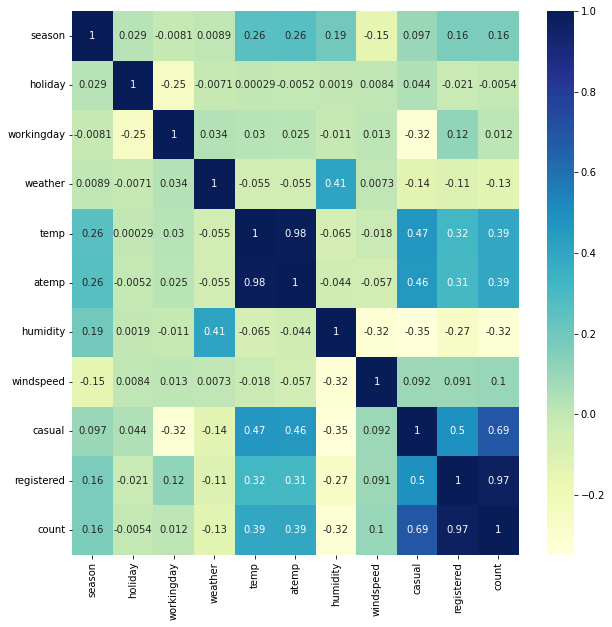

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
data['season'].replace([1,2,3,4], ["spring","summer", "fall", "winter"], inplace=True)

In [ ]:
data['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

In [ ]:
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
data['date'] = [dt.date() for dt in data.datetime]
data['month'] = data['datetime'].dt.month_name()
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['hour'] = data['datetime'].dt.hour
data['week_day'] = data['datetime'].dt.dayofweek

In [ ]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00  spring        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00  spring        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00  spring        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00  spring        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00  spring        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date    month  year  \
0        81        0.0       3          13     16  2011-01-01  January  2011   
1        80        0.0       8          32     40  2011-01-01  January  2011   
2        80        0.0       5          27     32  2011-01-01  January  2011   
3        75        0.0       3          10     13  2011-01-01  January  2011   
4        75        0.0       0           1      1  2011-01-01  January  2011   

   hour  week_day  
0     0         5  
1     1         5  
2     2         5  
3     3         5  
4     4         5

In [ ]:
categoryVariableList = ["season","holiday","workingday","weather","month","week_day"]
for x in categoryVariableList:
    data[x] = data[x].astype("category")

In [ ]:
data.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean     155.552177    191.574132   2011.501929     11.541613  
std      151.039033    181.144454      0.500019      6.915838  
min        0.000000      1.000000   2011.000000      0.000000  
25%       36.000000     42.000000   2011.000000      6.000000  
50%      118.000000    145.000000   2012.000000     12.000000  
75%      222.000000    284.000000   2012.000000     18.000000  
max      886.000000    977.000000   2012.000000     23.000000

In [ ]:
values = data['season'].value_counts()
normalized = data['season'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Season:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for Season:" + '\033[0m')
print(normalized)

Value counts for Season:
winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Season:
winter    0.25
fall      0.25
summer    0.25
spring    0.25
Name: season, dtype: float64


All the four seasons have 25% of data

In [ ]:
values = data['holiday'].value_counts()
normalized = data['holiday'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for holiday:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for holiday:" + '\033[0m')
print(normalized)

Value counts for holiday:
0    10575
1      311
Name: holiday, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for holiday:
0    0.97
1    0.03
Name: holiday, dtype: float64


Around 97% of data belongs to Non Holiday while 3% data is holiday

In [ ]:
values = data['workingday'].value_counts()
normalized = data['workingday'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for workingday:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for workingday:" + '\033[0m')
print(normalized)

Value counts for workingday:
1    7412
0    3474
Name: workingday, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for workingday:
1    0.68
0    0.32
Name: workingday, dtype: float64


Around 68% of data belongs to working day while 32% data is non working day

In [ ]:
values = data['weather'].value_counts()
normalized = data['weather'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for weather:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for weather:" + '\033[0m')
print(normalized)

Value counts for weather:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for weather:
1    0.66
2    0.26
3    0.08
4    0.00
Name: weather, dtype: float64


In [ ]:
values = data['month'].value_counts()
normalized = data['month'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for month:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for month:" + '\033[0m')
print(normalized)

Value counts for month:
August       912
December     912
July         912
June         912
May          912
November     911
October      911
April        909
September    909
February     901
March        901
January      884
Name: month, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for month:
August       0.08
December     0.08
July         0.08
June         0.08
May          0.08
November     0.08
October      0.08
April        0.08
September    0.08
February     0.08
March        0.08
January      0.08
Name: month, dtype: float64


In [ ]:
values = data['week_day'].value_counts()
normalized = data['week_day'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for week_day:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for week_day:" + '\033[0m')
print(normalized)

Value counts for week_day:
5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: week_day, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for week_day:
5    0.15
6    0.15
3    0.14
0    0.14
2    0.14
1    0.14
4    0.14
Name: week_day, dtype: float64


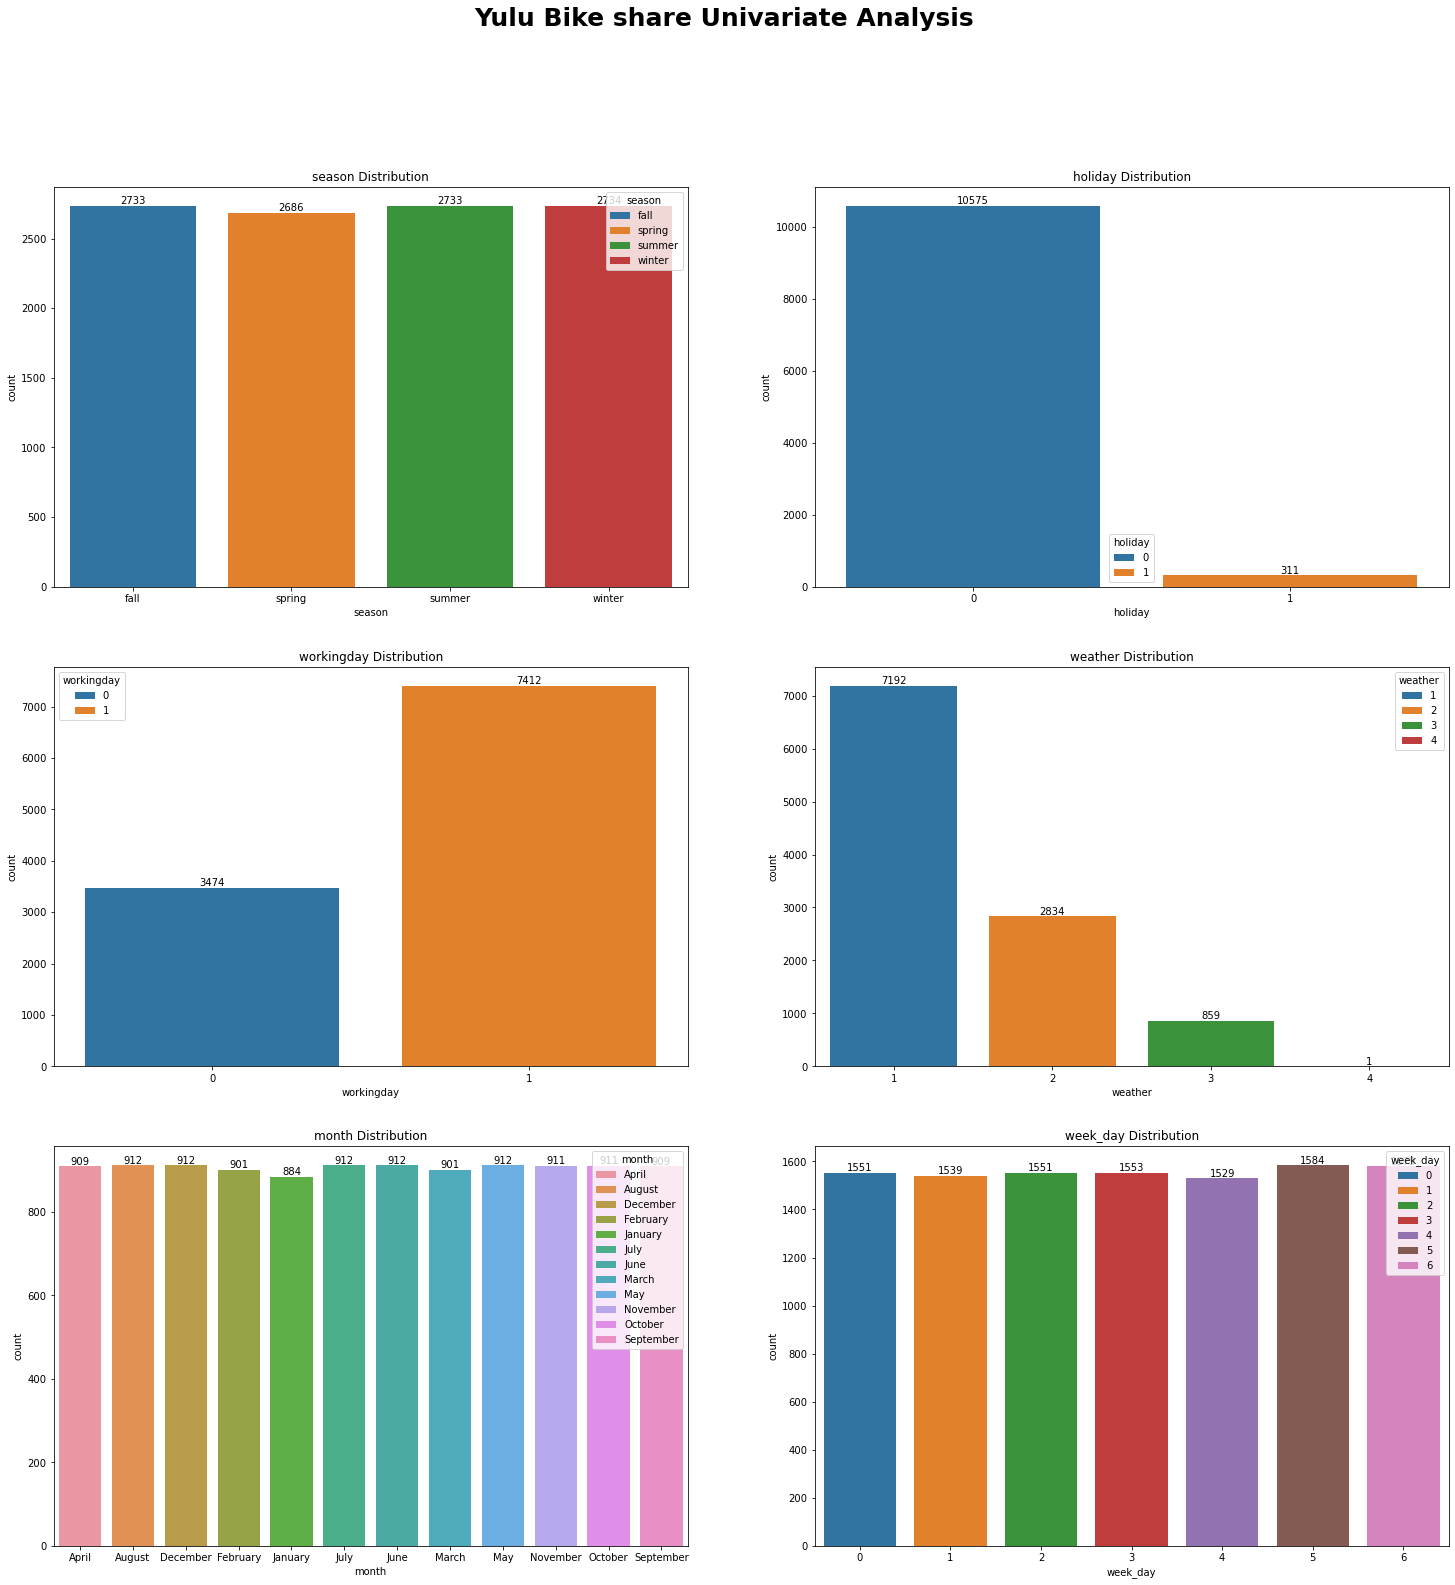

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(25, 25), sharey=False)
fig.suptitle("Yulu Bike share Univariate Analysis " , fontsize=25, fontweight='bold')
graph = sns.countplot(x = 'season', hue= 'season', data= data, dodge = False , ax = axs[0, 0])
for i in graph.containers:
 graph.bar_label(i,)
graph.set_title("season Distribution", fontsize = 12)
graph2 = sns.countplot(x = 'holiday', hue = 'holiday', data = data , dodge=False, ax = axs[0, 1])
for i in graph2.containers:
 graph2.bar_label(i,)
graph2.set_title("holiday Distribution", fontsize = 12)
graph3 = sns.countplot(x = 'workingday', hue = 'workingday' ,data = data , dodge=False, ax = axs[1, 0])
for i in graph3.containers:
 graph3.bar_label(i,)
graph3.set_title("workingday Distribution", fontsize = 12)
graph4 = sns.countplot(x = 'weather', hue= 'weather', data= data, dodge = False , ax = axs[1,1])
for i in graph4.containers:
 graph4.bar_label(i,)
graph4.set_title("weather Distribution", fontsize = 12)
graph5 = sns.countplot(x = 'month', hue = 'month', data = data , dodge=False, ax = axs[2, 0])
for i in graph5.containers:
 graph5.bar_label(i,)
graph5.set_title("month Distribution", fontsize = 12)
graph6 = sns.countplot(x = 'week_day', hue = 'week_day' ,data = data, dodge=False, ax = axs[2, 1])
# sns.move_legend(graph6, "upper left", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
for i in graph6.containers:
 graph6.bar_label(i,)
graph6.set_title("week_day Distribution", fontsize = 12)
plt.show()


In [ ]:
def outlierAnalysis(x):
    Q3, Q1 = np.percentile(data[x], [75 ,25])
    IQR = Q3 - Q1
    maxExcludingOutlier = Q3 + 1.5 * IQR
    minExcludingOutlier = Q1 - 1.5 * IQR
    mean = round(data[x].mean(),2)
    median = round(data[x].median(),2)
    mode = round(data[x].mode(), 2)
    print("For the given sample" +x  +"Analysis is as Follows: ")
    print("Q1: ", Q1)
    print("Q3: ", Q3)
    print("Mean: ", round(data[x].mean(),2))
    print("Median: ", data[x].median())
    print("Mode: " , round(data[x].mode(), 2))
    print("IQR: " , IQR)
    print("Maximum" + x +"Excluding Outlier: " , maxExcludingOutlier)
    print("Minimum" + x + "Purchase Excluding Outlier: " , minExcludingOutlier)

In [ ]:
def SharpioWilkTestNormality(data):
    return stats.shapiro(data)

In [ ]:
data['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
outlierAnalysis('temp')

For the given sampletempAnalysis is as Follows: 
Q1:  13.94
Q3:  26.24
Mean:  20.23
Median:  20.5
Mode:  0    14.76
dtype: float64
IQR:  12.299999999999999
MaximumtempExcluding Outlier:  44.69
MinimumtempPurchase Excluding Outlier:  -4.51


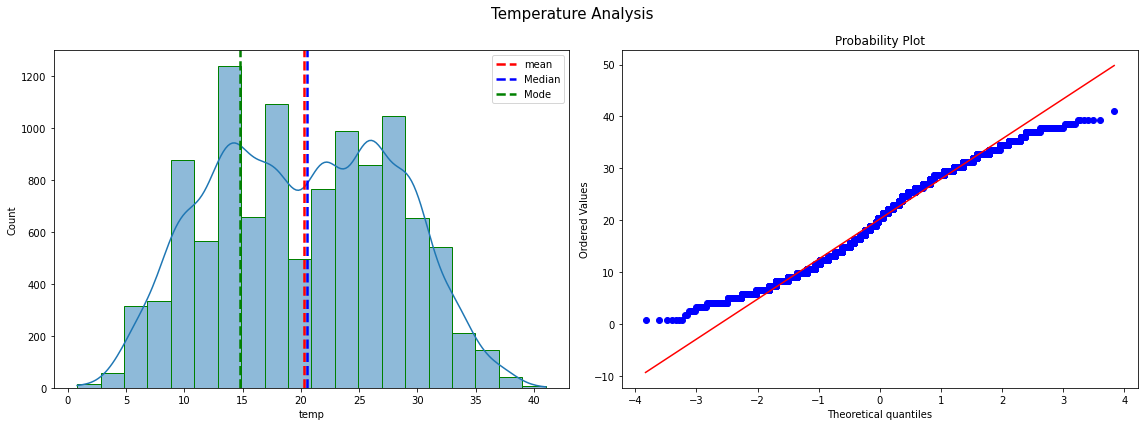

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Temperature Analysis", fontsize = 15)
g1 = sns.histplot(data['temp'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['temp'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['temp'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['temp'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['temp'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['temp'])

ShapiroResult(statistic=0.9804092645645142, pvalue=4.47221826500091e-36)

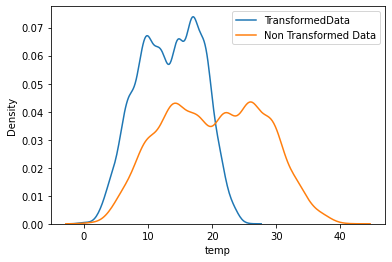

In [ ]:
transformed_data, best_lambda = stats.boxcox(data['temp'])
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['temp'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9809976816177368, pvalue=1.2461957729480328e-35)

In [ ]:
data['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [ ]:
outlierAnalysis('atemp')

For the given sampleatempAnalysis is as Follows: 
Q1:  16.665
Q3:  31.06
Mean:  23.66
Median:  24.24
Mode:  0    31.06
dtype: float64
IQR:  14.395
MaximumatempExcluding Outlier:  52.6525
MinimumatempPurchase Excluding Outlier:  -4.927500000000002


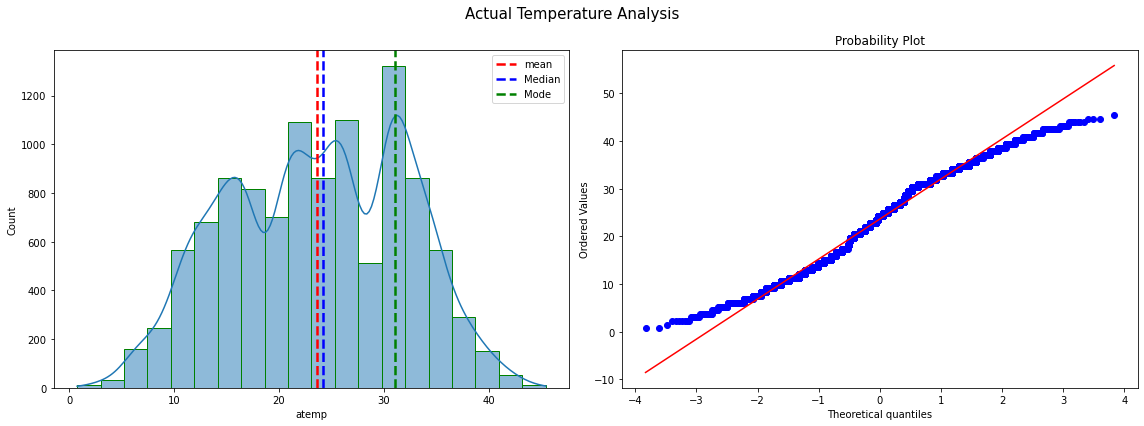

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Actual Temperature Analysis", fontsize = 15)
g1 = sns.histplot(data['atemp'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['atemp'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['atemp'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['atemp'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['atemp'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['atemp'])

ShapiroResult(statistic=0.9815691709518433, pvalue=3.4538982852050647e-35)

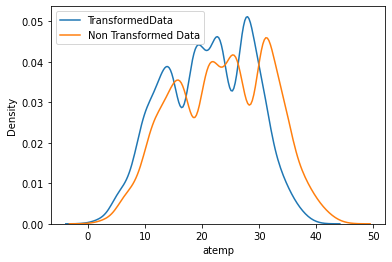

In [ ]:
transformed_data, best_lambda = stats.boxcox(data['atemp'])
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['atemp'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9814138412475586, pvalue=2.611741530674842e-35)

In [ ]:
data['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [ ]:
outlierAnalysis('humidity')

For the given samplehumidityAnalysis is as Follows: 
Q1:  47.0
Q3:  77.0
Mean:  61.89
Median:  62.0
Mode:  0    88
dtype: int64
IQR:  30.0
MaximumhumidityExcluding Outlier:  122.0
MinimumhumidityPurchase Excluding Outlier:  2.0


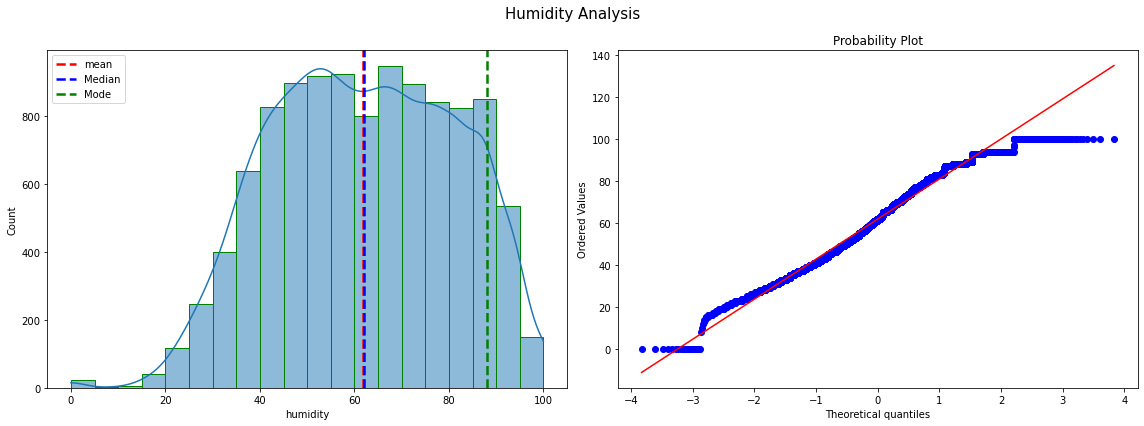

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Humidity Analysis", fontsize = 15)
g1 = sns.histplot(data['humidity'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['humidity'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['humidity'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['humidity'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['humidity'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['humidity'])

ShapiroResult(statistic=0.9822689294815063, pvalue=1.245496990918048e-34)

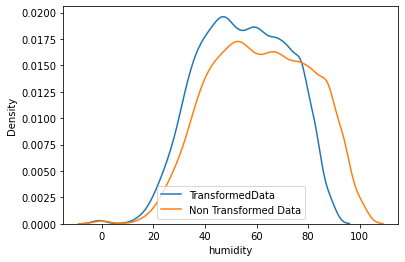

In [ ]:
from scipy import special
transformed_data = special.boxcox(data['humidity'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['humidity'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9822365045547485, pvalue=1.1726414811341395e-34)

In [ ]:
data['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [ ]:
outlierAnalysis('windspeed')

For the given samplewindspeedAnalysis is as Follows: 
Q1:  7.0015
Q3:  16.9979
Mean:  12.8
Median:  12.998
Mode:  0    0.0
dtype: float64
IQR:  9.996400000000001
MaximumwindspeedExcluding Outlier:  31.992500000000003
MinimumwindspeedPurchase Excluding Outlier:  -7.993100000000002


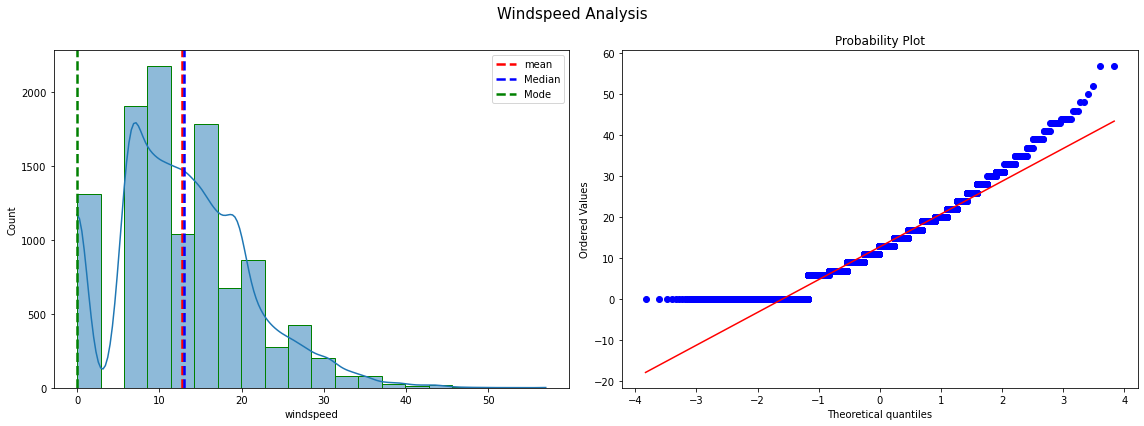

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Windspeed Analysis", fontsize = 15)
g1 = sns.histplot(data['windspeed'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['windspeed'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['windspeed'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['windspeed'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['windspeed'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['windspeed'])

ShapiroResult(statistic=0.9587375521659851, pvalue=0.0)

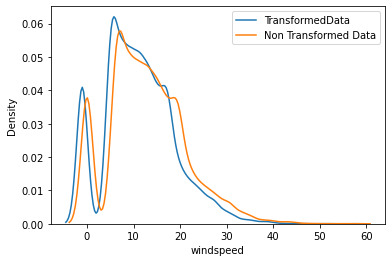

In [ ]:
transformed_data = special.boxcox(data['windspeed'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['windspeed'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.961715579032898, pvalue=0.0)

In [ ]:
data['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [ ]:
outlierAnalysis('casual')

For the given samplecasualAnalysis is as Follows: 
Q1:  4.0
Q3:  49.0
Mean:  36.02
Median:  17.0
Mode:  0    0
dtype: int64
IQR:  45.0
MaximumcasualExcluding Outlier:  116.5
MinimumcasualPurchase Excluding Outlier:  -63.5


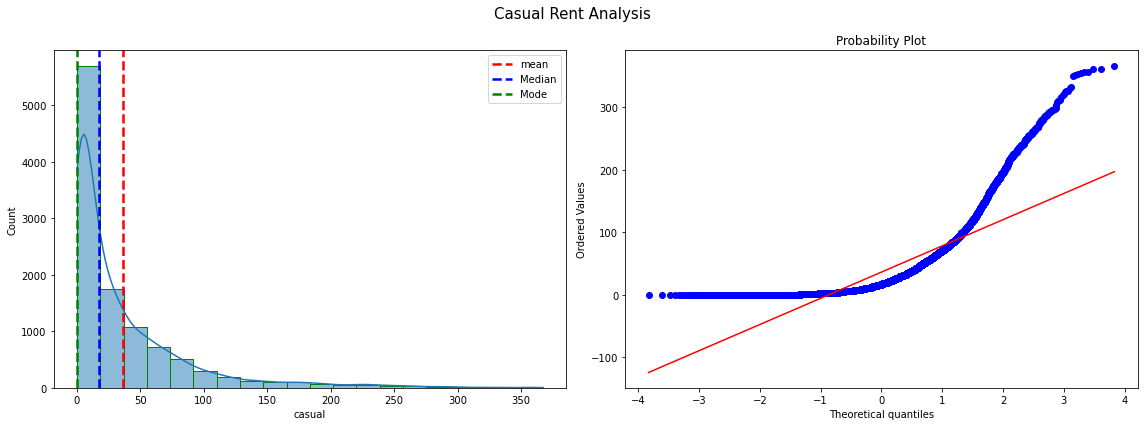

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Casual Rent Analysis", fontsize = 15)
g1 = sns.histplot(data['casual'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['casual'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['casual'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['casual'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['casual'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['casual'])

ShapiroResult(statistic=0.7056357264518738, pvalue=0.0)

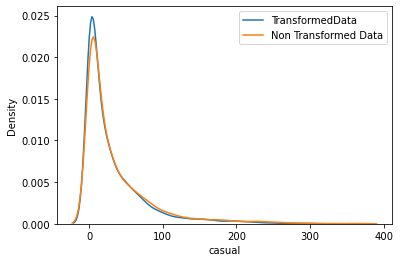

In [ ]:
transformed_data = special.boxcox(data['casual'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['casual'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.7198955416679382, pvalue=0.0)

In [ ]:
data['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [ ]:
outlierAnalysis('registered')

For the given sampleregisteredAnalysis is as Follows: 
Q1:  36.0
Q3:  222.0
Mean:  155.55
Median:  118.0
Mode:  0    3
dtype: int64
IQR:  186.0
MaximumregisteredExcluding Outlier:  501.0
MinimumregisteredPurchase Excluding Outlier:  -243.0


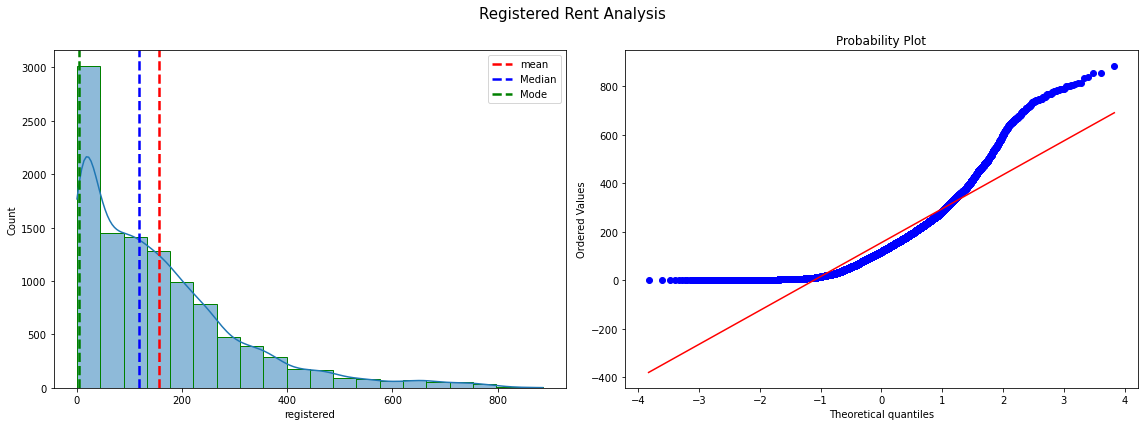

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Registered Rent Analysis", fontsize = 15)
g1 = sns.histplot(data['registered'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['registered'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['registered'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['registered'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['registered'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['registered'])

ShapiroResult(statistic=0.8562824726104736, pvalue=0.0)

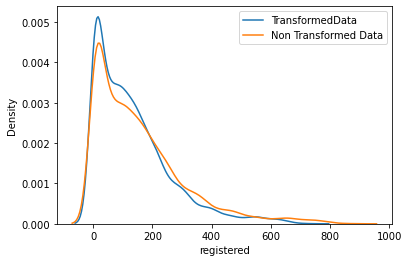

In [ ]:
transformed_data = special.boxcox(data['registered'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['registered'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8662973642349243, pvalue=0.0)

In [ ]:
data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
outlierAnalysis('count')

For the given samplecountAnalysis is as Follows: 
Q1:  42.0
Q3:  284.0
Mean:  191.57
Median:  145.0
Mode:  0    5
dtype: int64
IQR:  242.0
MaximumcountExcluding Outlier:  647.0
MinimumcountPurchase Excluding Outlier:  -321.0


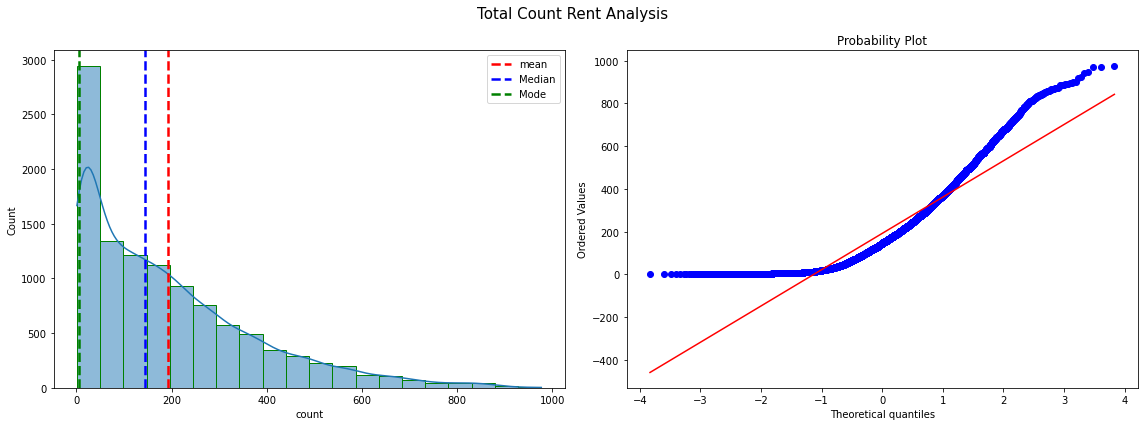

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Total Count Rent Analysis", fontsize = 15)
g1 = sns.histplot(data['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data['count'])

ShapiroResult(statistic=0.8783667087554932, pvalue=0.0)

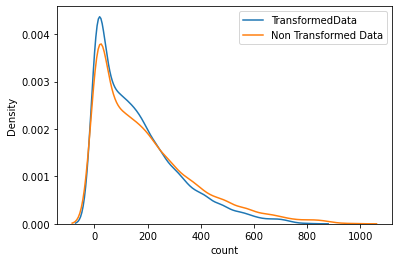

In [ ]:
transformed_data = special.boxcox(data['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8864942193031311, pvalue=0.0)

In [ ]:
data['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [ ]:
data['year'].value_counts(normalize=True)

2012    0.501929
2011    0.498071
Name: year, dtype: float64

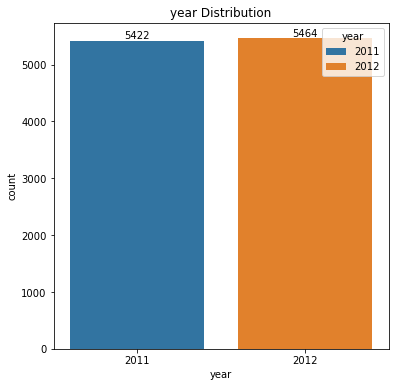

In [ ]:
plt.figure(figsize=(6,6))
graph = sns.countplot(x = 'year', hue= 'year', data= data, dodge = False)
for i in graph.containers:
 graph.bar_label(i,)
graph.set_title("year Distribution", fontsize = 12)
plt.show()

In [ ]:
data['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

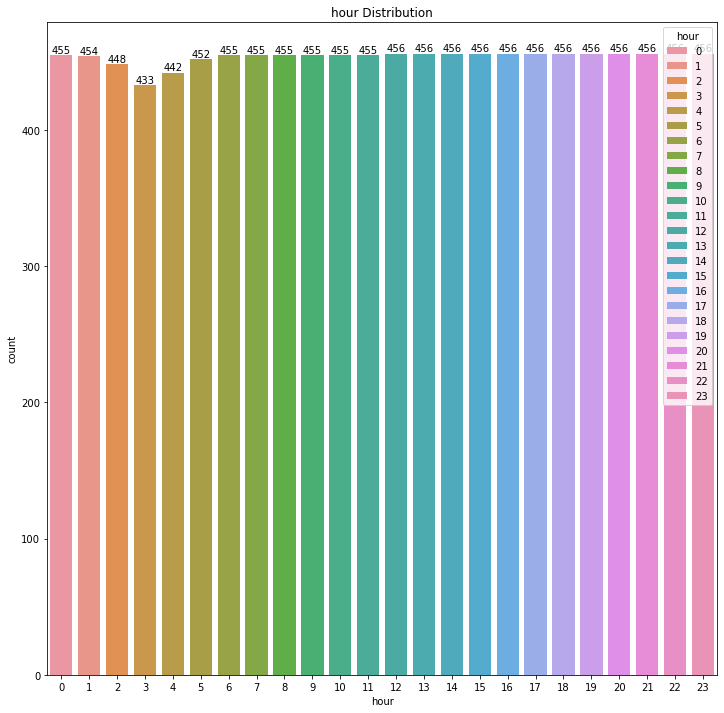

In [ ]:
plt.figure(figsize=(12,12))
graph = sns.countplot(x = 'hour', hue= 'hour', data= data, dodge = False)
for i in graph.containers:
 graph.bar_label(i,)
graph.set_title("hour Distribution", fontsize = 12)
plt.show()

In [ ]:
def BoxPlots(val):
    fig, axs = plt.subplots(4, 2, figsize=(25, 25), sharey=False)
    suptitle = "Bivariate Analysis for Category: " + val
    fig.suptitle(suptitle , fontsize=25, fontweight='bold')
    graph = sns.boxplot(x = val, hue= val, y = 'temp', data= data, dodge = False , ax = axs[0, 0])
    title1 = val + "Distribution wrt temp"
    graph.set_title(title1, fontsize = 12)
    graph2 = sns.boxplot(x = val, hue= val, y = 'atemp', data = data , dodge=False, ax = axs[0, 1])
    title1 = val + "Distribution wrt atemp"
    graph2.set_title(title1, fontsize = 12)
    graph3 = sns.boxplot(x = val, hue= val, y = 'humidity',data = data , dodge=False, ax = axs[1, 0])
    title1 = val + "Distribution wrt humidity"
    graph3.set_title(title1, fontsize = 12)
    graph4 = sns.boxplot(x = val, hue= val, y = 'windspeed', data= data, dodge = False , ax = axs[1,1])
    title1 = val + "Distribution wrt windspeed"
    graph4.set_title(title1, fontsize = 12)
    graph5 = sns.boxplot(x = val, hue= val, y = 'casual', data = data , dodge=False, ax = axs[2, 0])
    title1 = val + "Distribution wrt casual"
    graph5.set_title(title1, fontsize = 12)
    graph6 = sns.boxplot(x = val, hue= val, y = 'registered' ,data = data, dodge=False, ax = axs[2, 1])
    title1 = val + "Distribution wrt Registered"
    graph6.set_title(title1, fontsize = 12)
    graph7 = sns.boxplot(x = val, hue= val, y = 'count' ,data = data, dodge=False, ax = axs[3, 0])
    title1 = val + "Distribution wrt count"
    graph7.set_title(title1, fontsize = 12)
    plt.show()

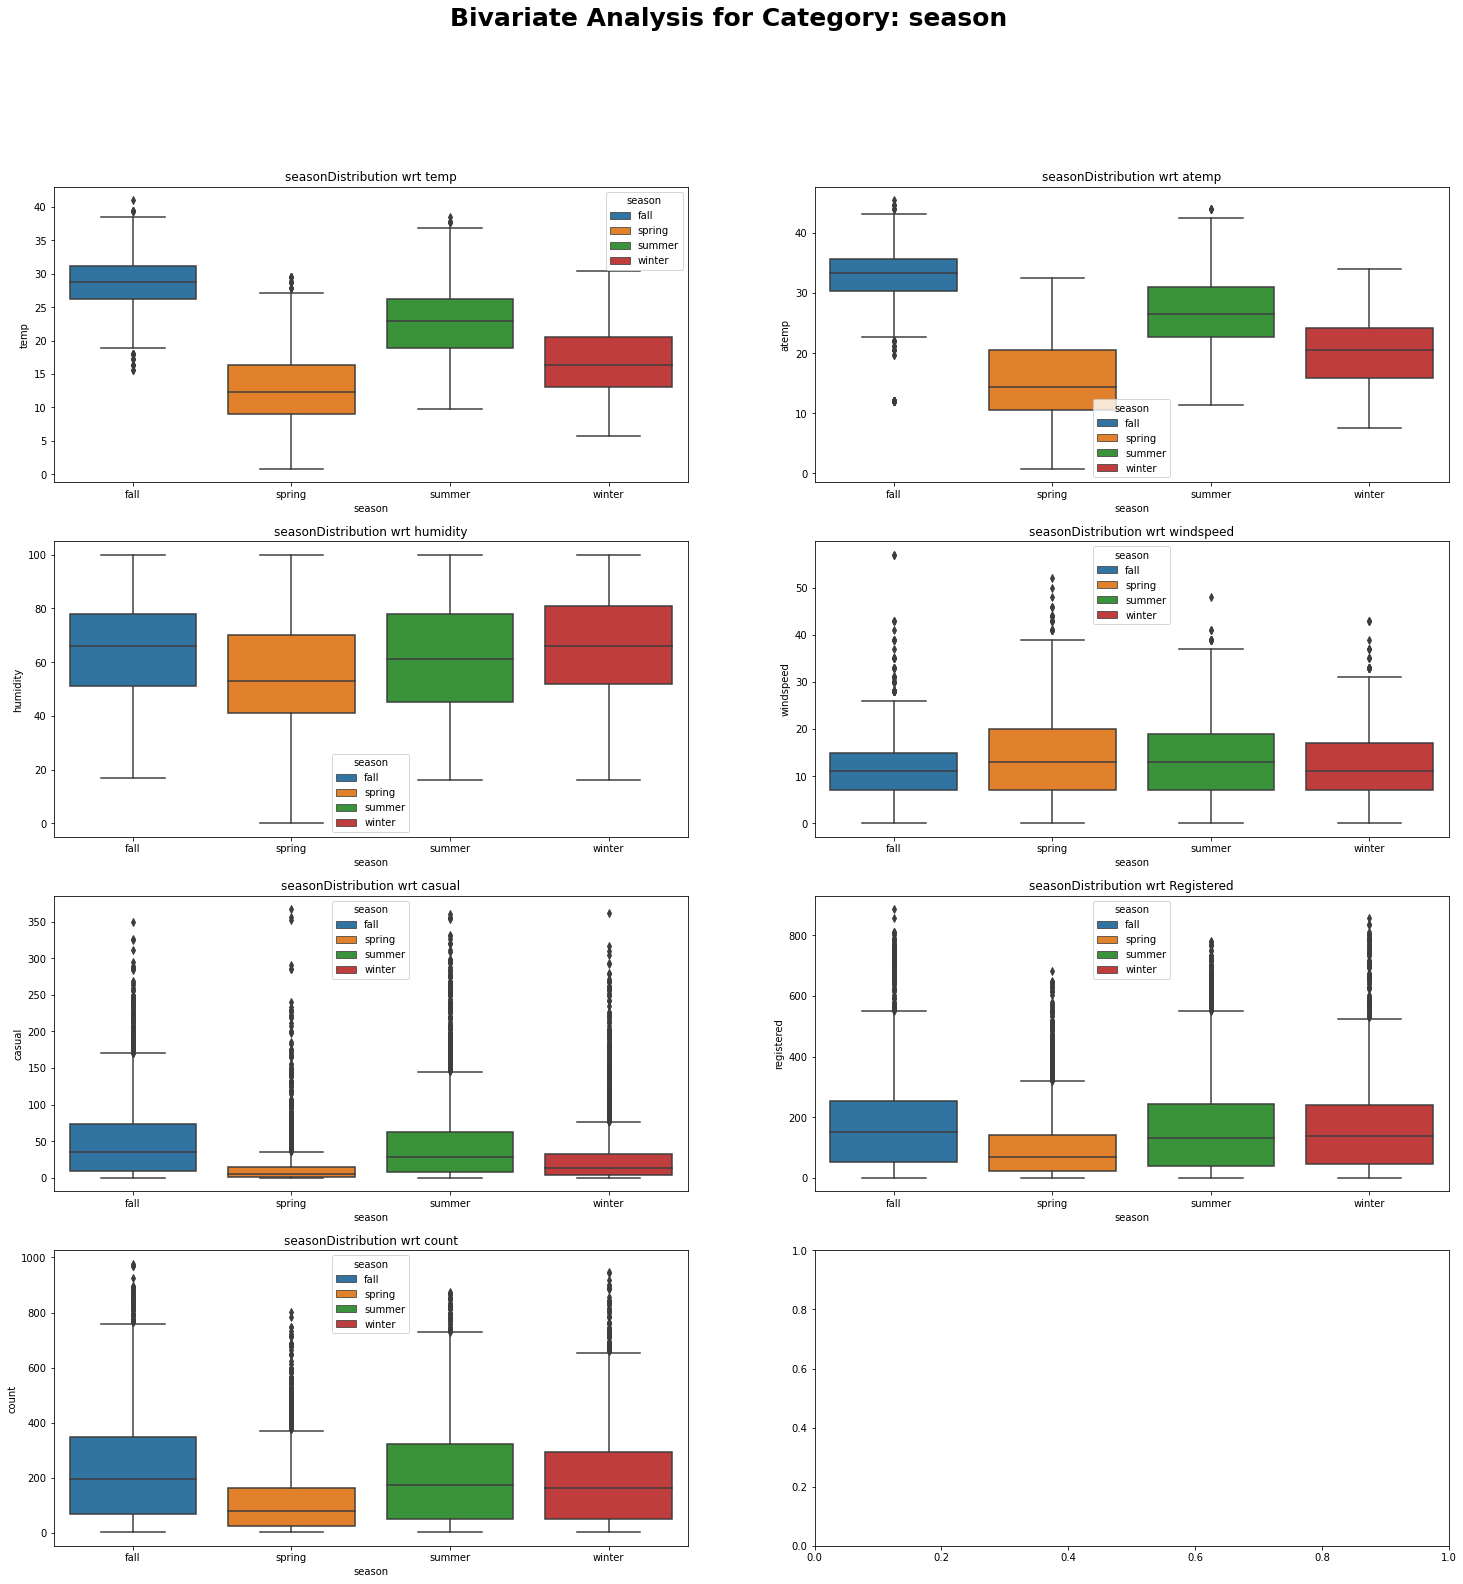

In [ ]:
BoxPlots("season")

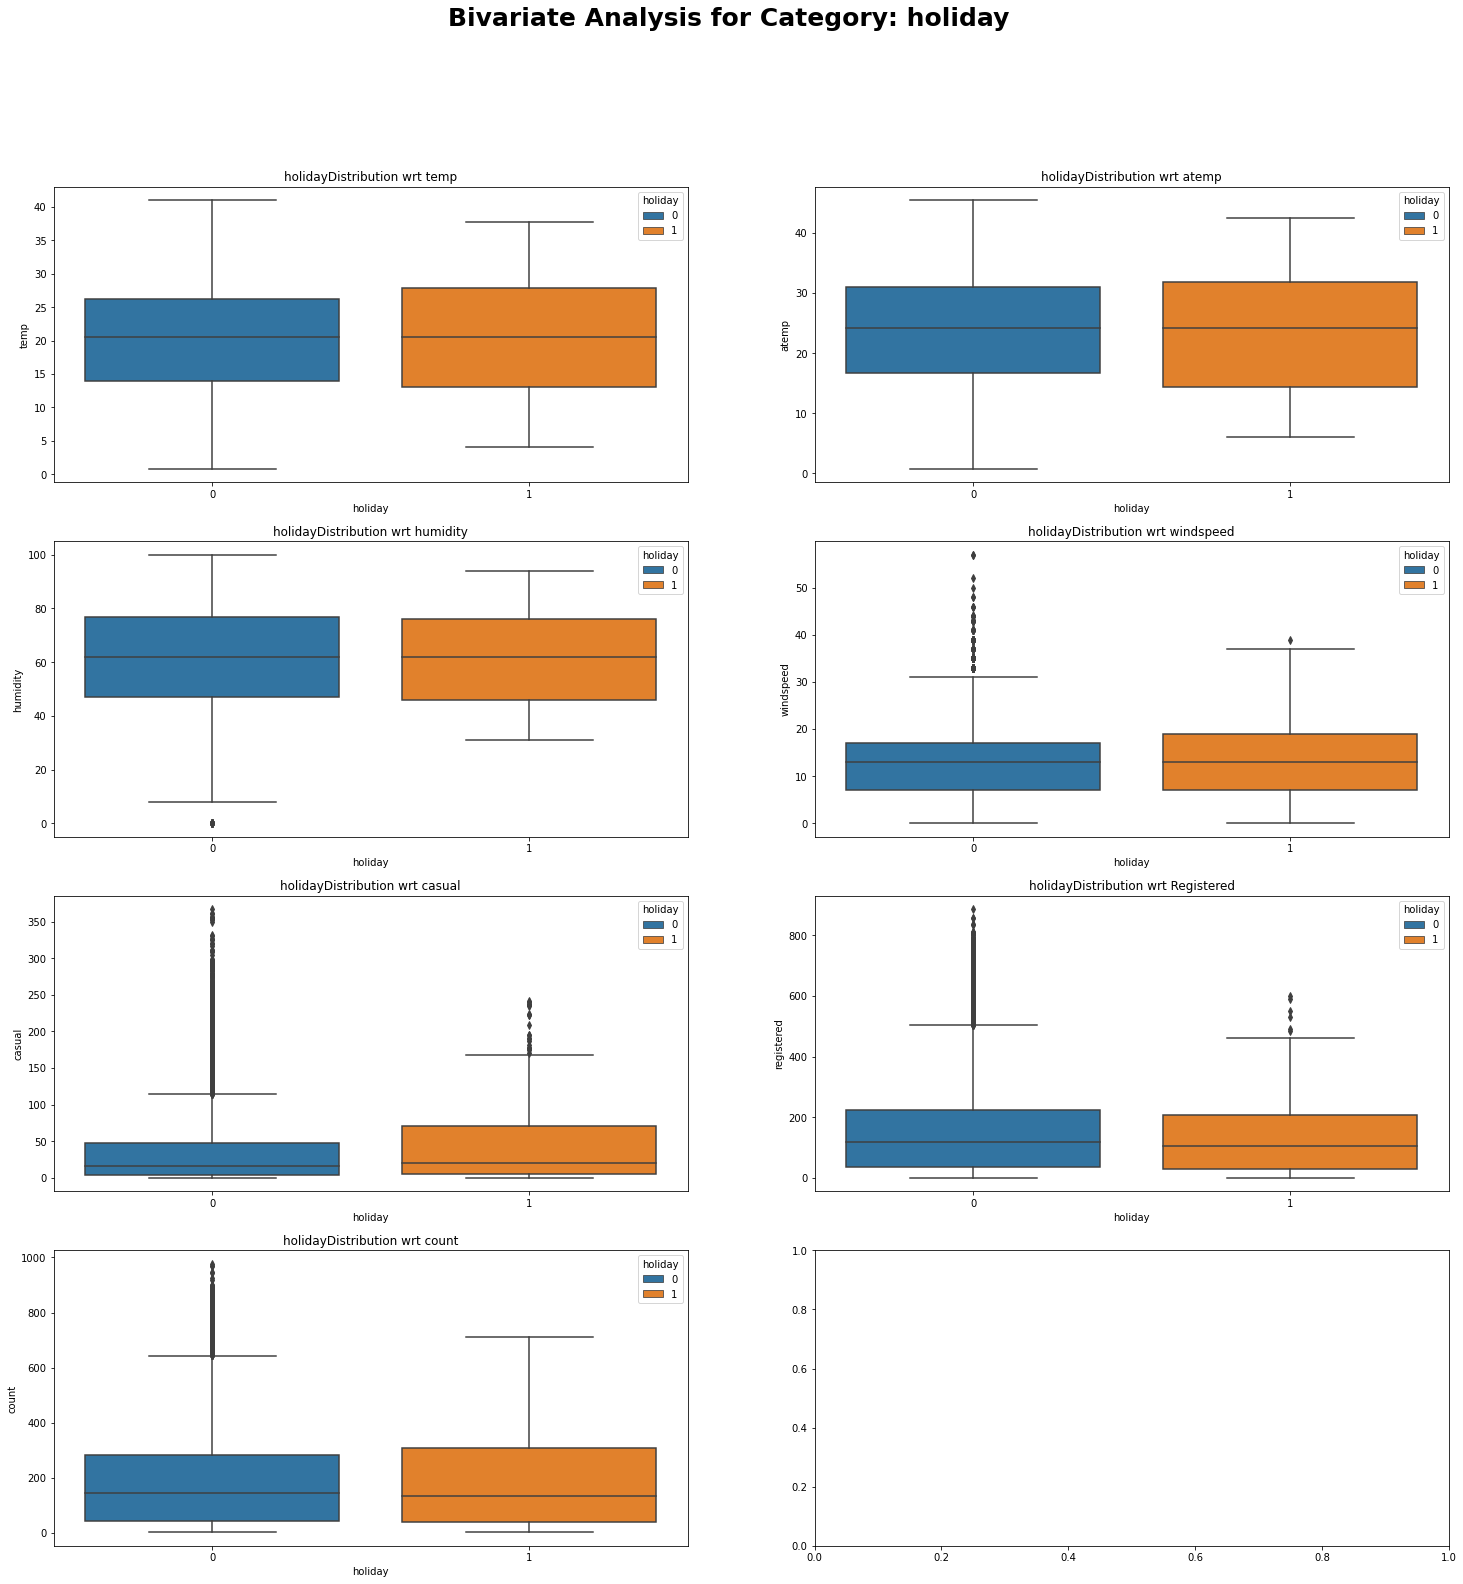

In [ ]:
BoxPlots("holiday")

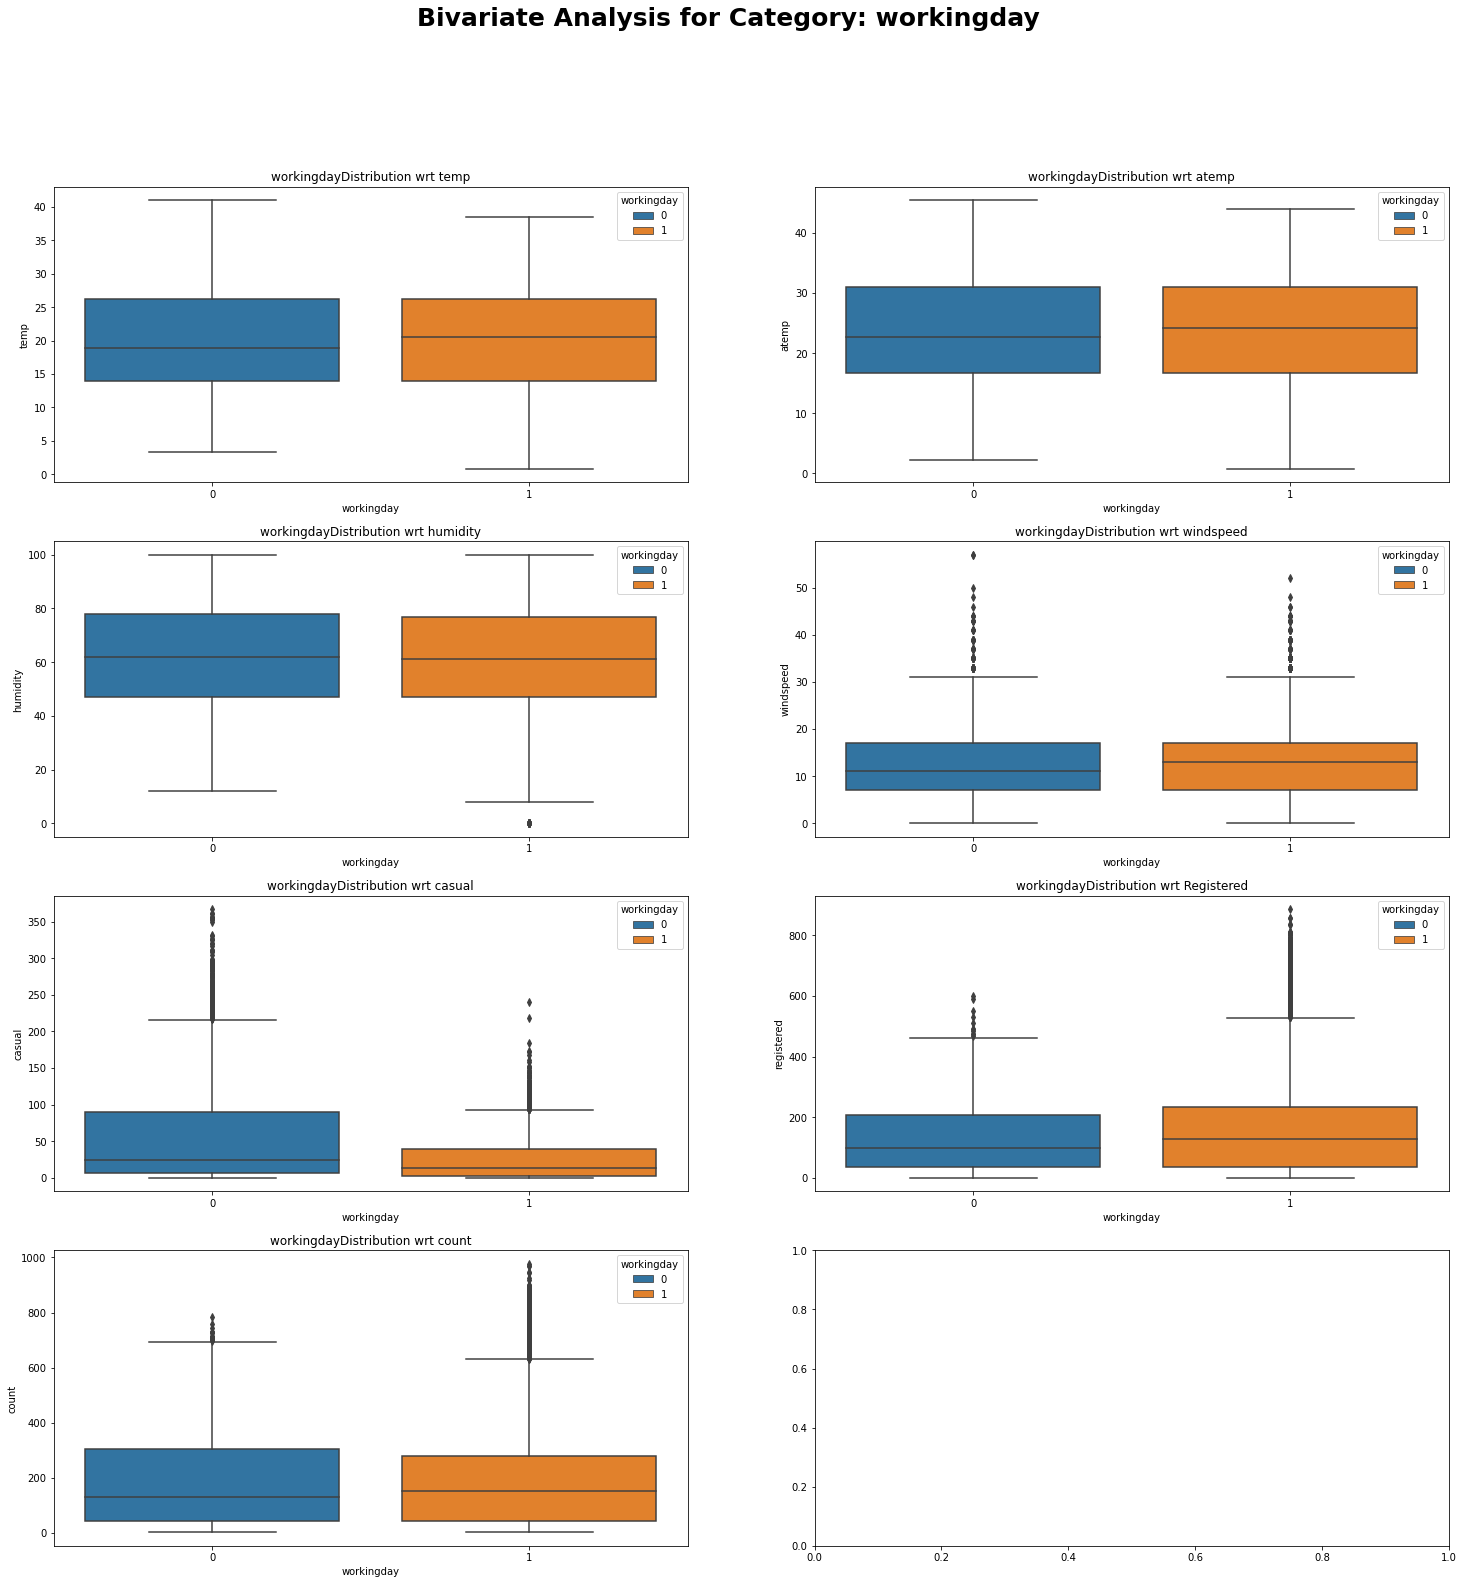

In [ ]:
BoxPlots("workingday")

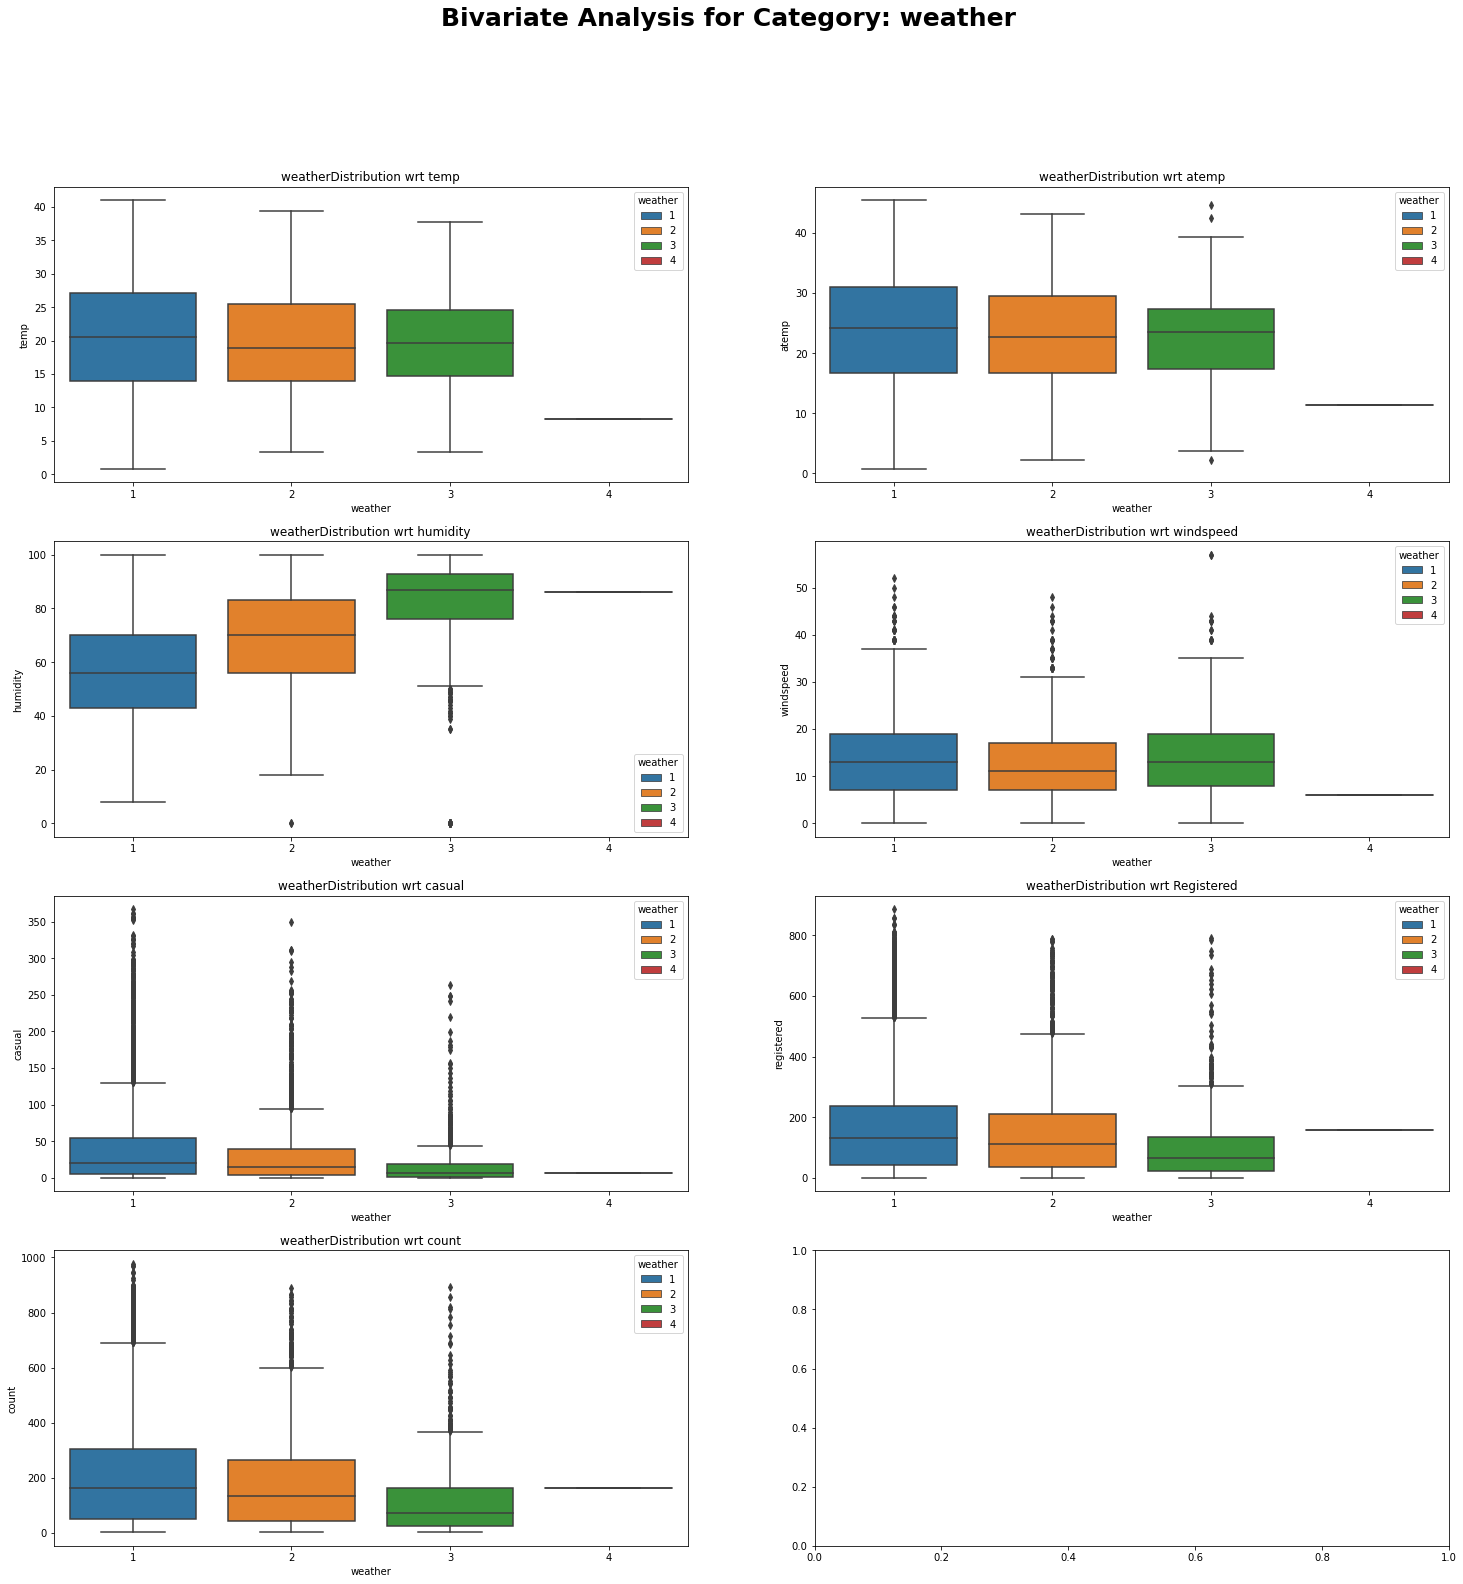

In [ ]:
BoxPlots("weather")

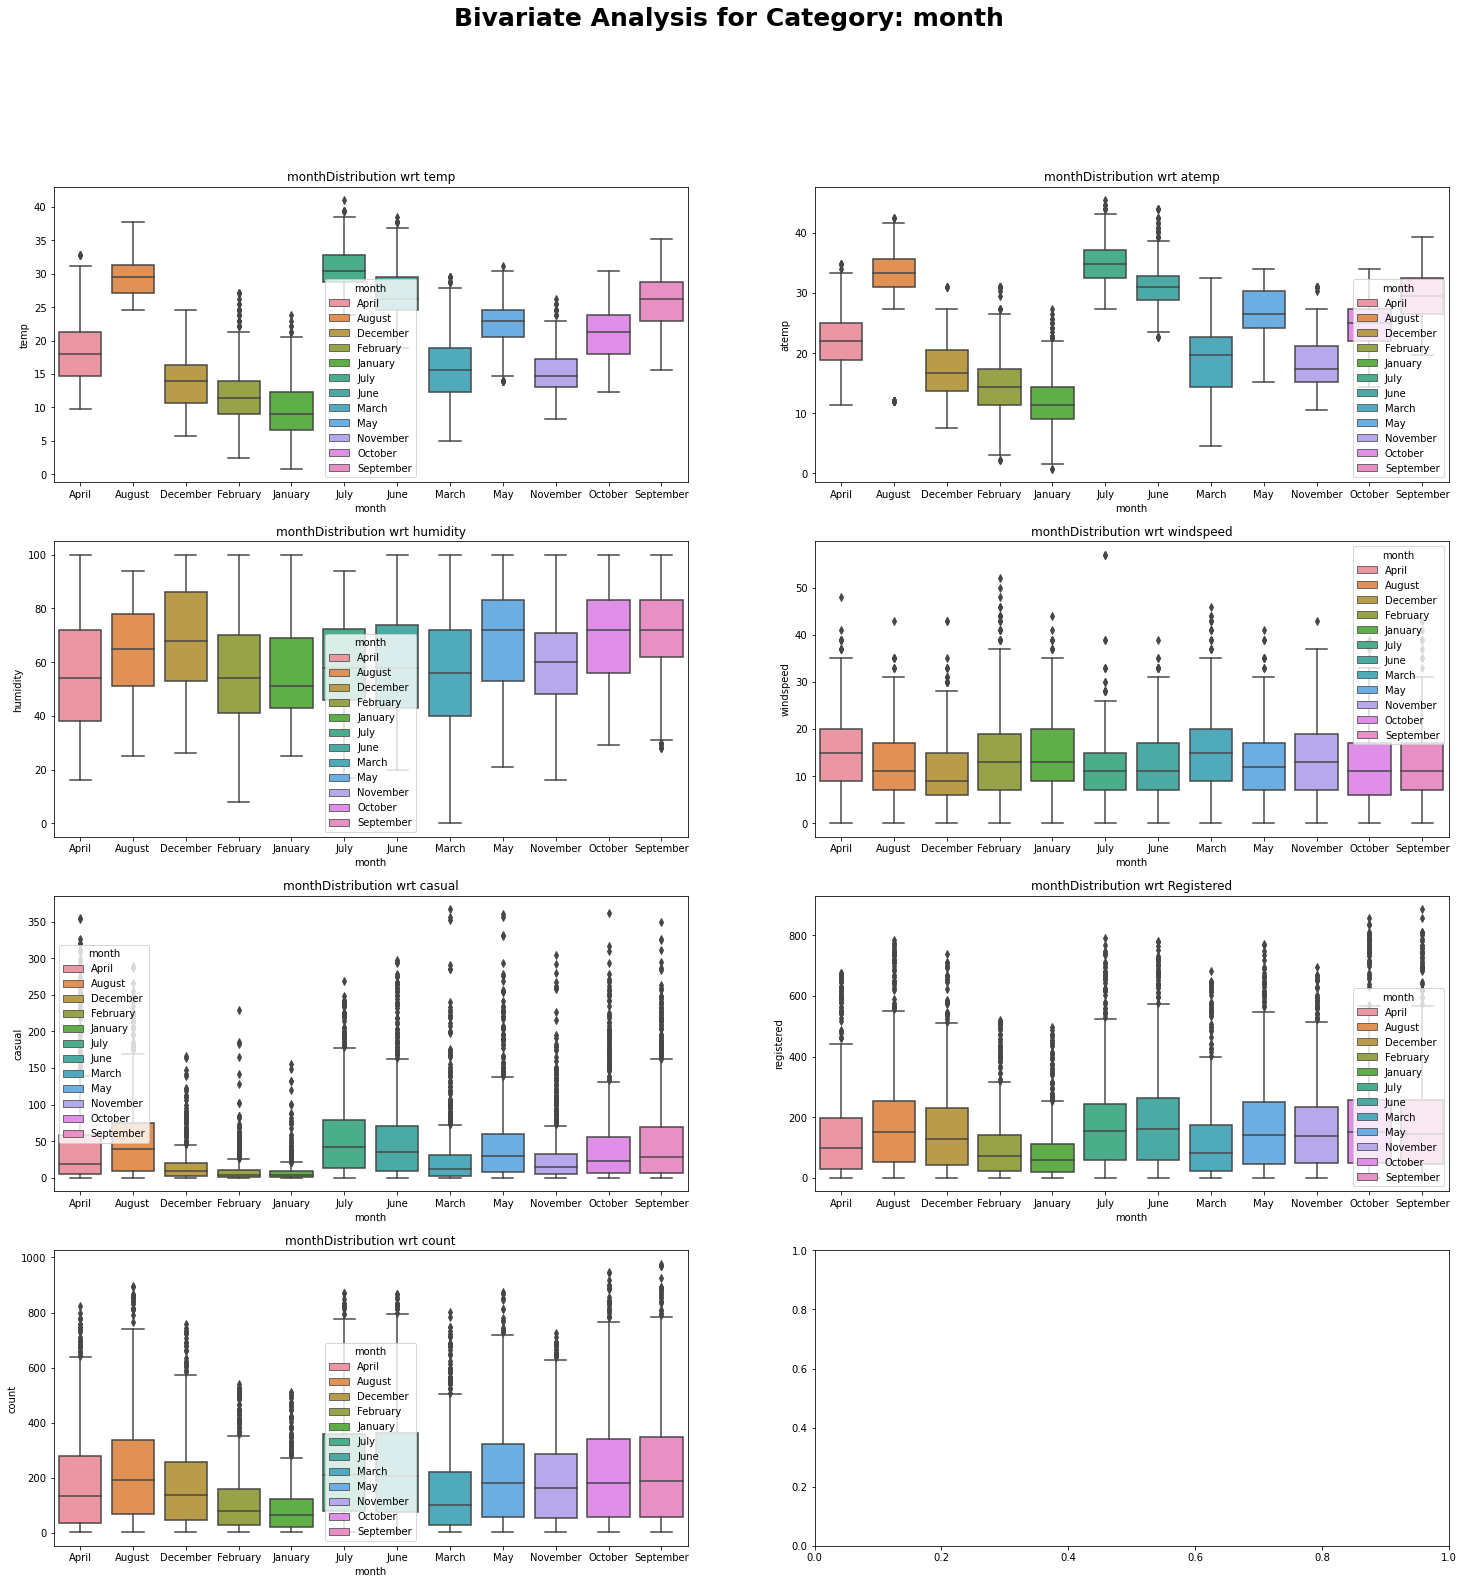

In [ ]:
BoxPlots("month")

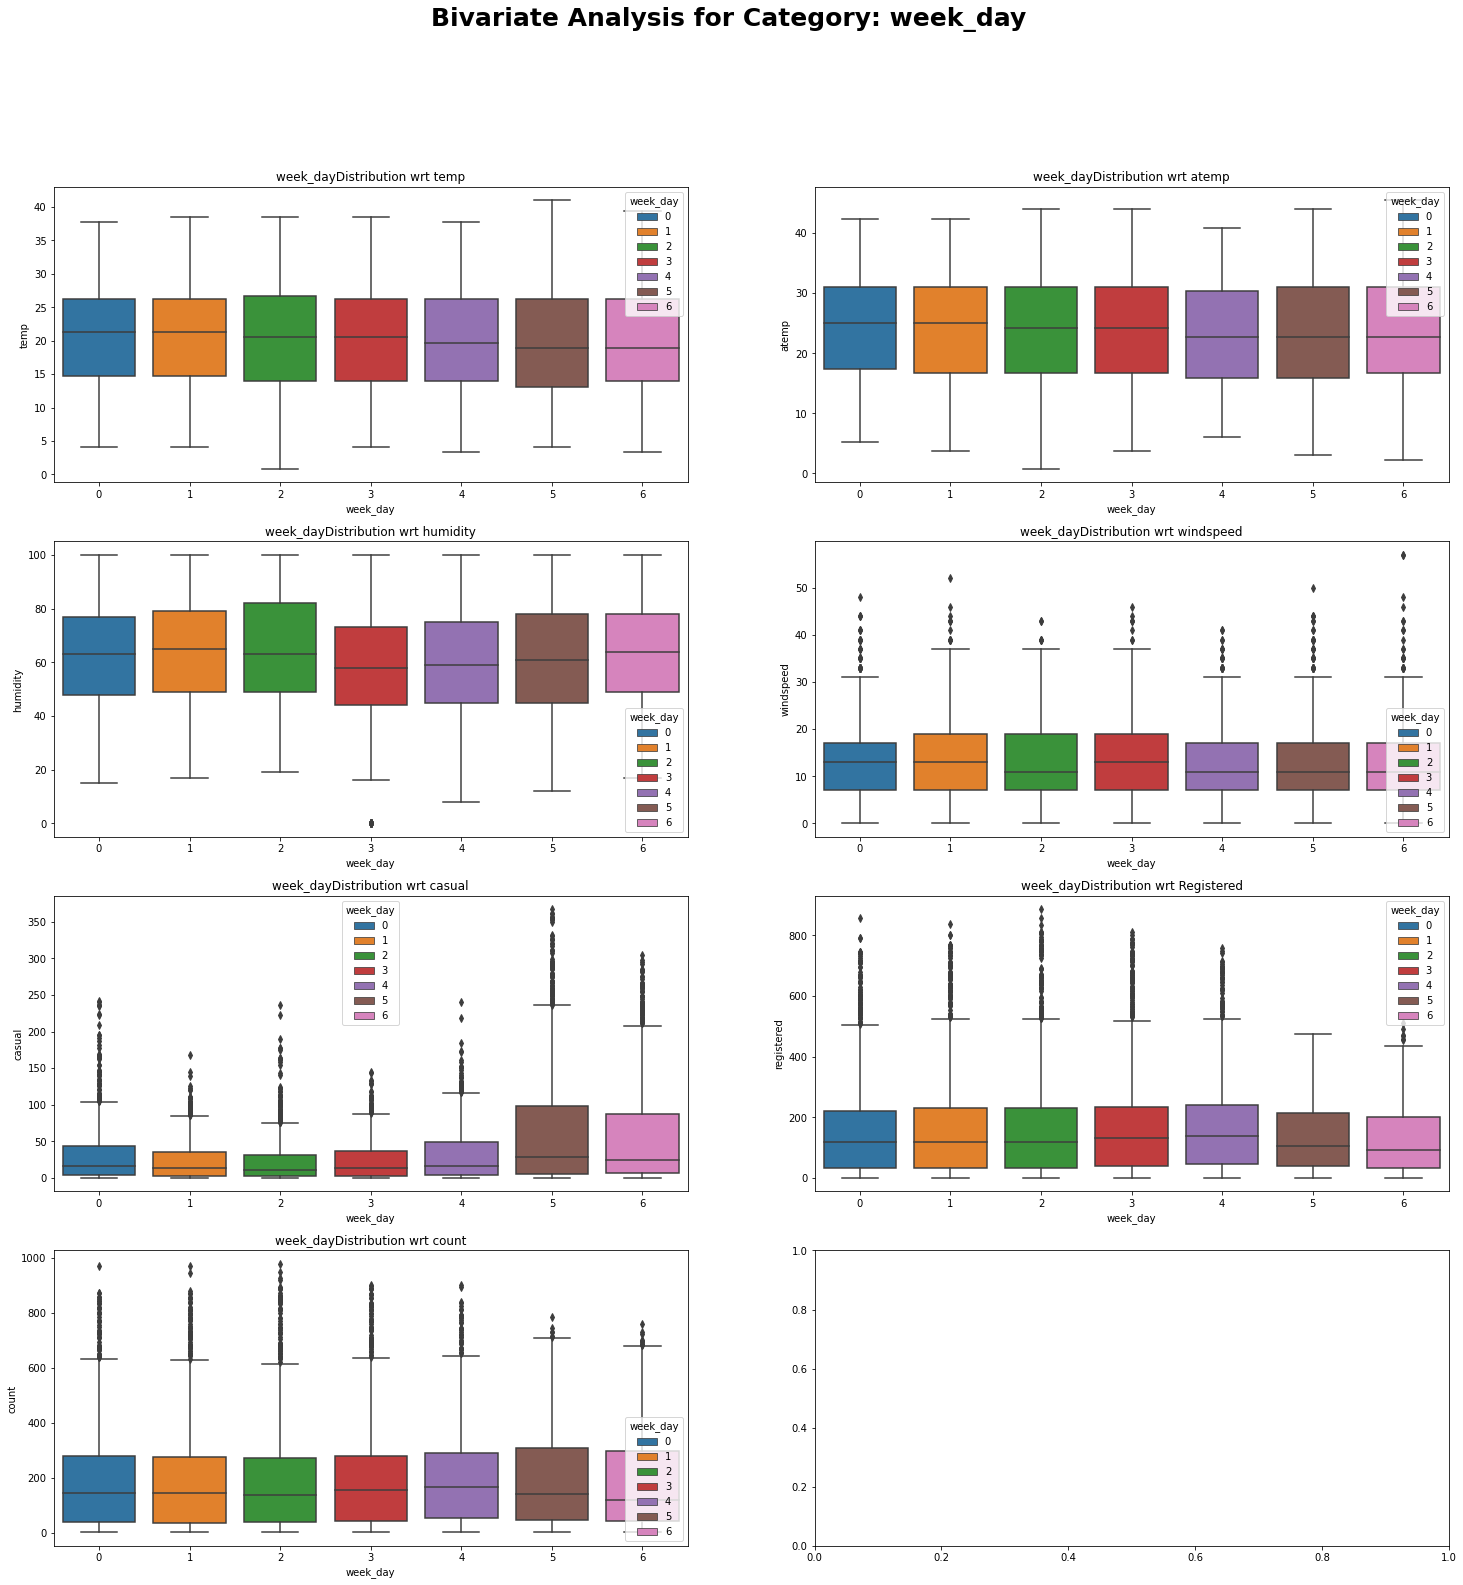

In [ ]:
BoxPlots("week_day")

### Working Day and Total Bikes rented Analysis

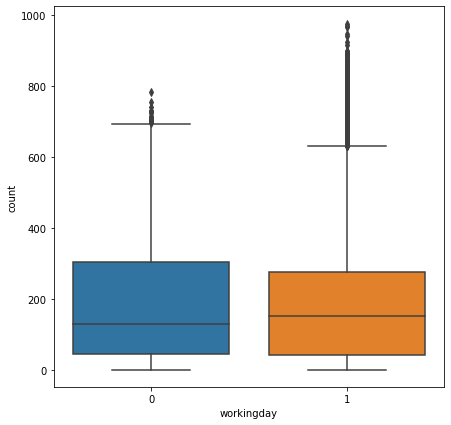

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data, x = 'workingday', y = 'count')
plt.show()

In [ ]:
data1 = data.loc[data['workingday'] == 1]['count'].reset_index()
data1.drop(['index'], axis = 1, inplace= True)
data1.T

0     1     2     3     4     5     6     7     8     9     ...  7402  \
count     5     2     1     3    30    64   154    88    44    51  ...   218   

       7403  7404  7405  7406  7407  7408  7409  7410  7411  
count   237   334   562   569   336   241   168   129    88  

[1 rows x 7412 columns]

In [ ]:
data2 = data.loc[data['workingday'] == 0]['count'].reset_index()
data2.drop(['index'], axis = 1, inplace= True)
data2.T

0     1     2     3     4     5     6     7     8     9     ...  3464  \
count    16    40    32    13     1     1     2     3     8    14  ...   310   

       3465  3466  3467  3468  3469  3470  3471  3472  3473  
count   338   400   243   107   109   122   106    89    33  

[1 rows x 3474 columns]

As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1

In [ ]:
data1.describe().T

count        mean         std  min   25%    50%    75%    max
count  7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

In [ ]:
data2.describe().T

count        mean         std  min   25%    50%    75%    max
count  3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0

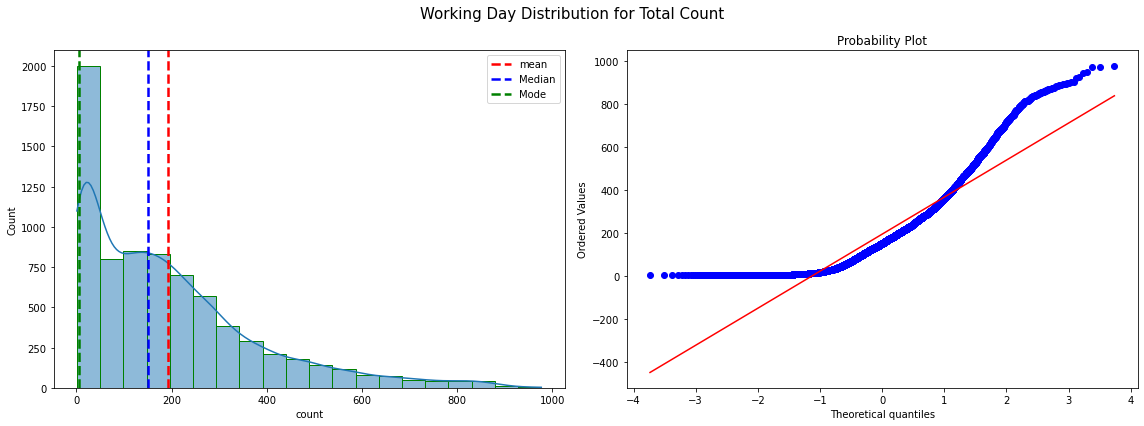

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Working Day Distribution for Total Count", fontsize = 15)
g1 = sns.histplot(data1['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data1['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data1['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data1['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data1['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data1['count'])

ShapiroResult(statistic=0.8702576160430908, pvalue=0.0)

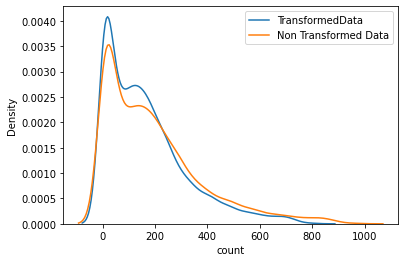

In [ ]:
transformed_data = special.boxcox(data1['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data1['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8791995644569397, pvalue=0.0)

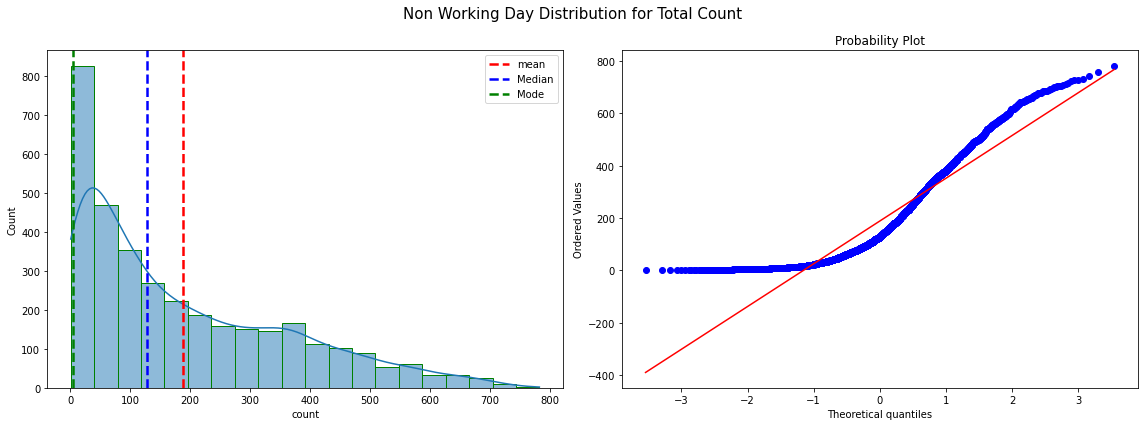

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Non Working Day Distribution for Total Count", fontsize = 15)
g1 = sns.histplot(data2['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data2['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data2['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data2['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data2['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data2['count'])

ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)

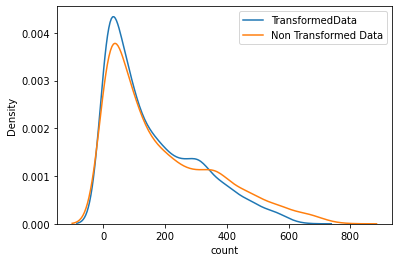

In [ ]:
transformed_data = special.boxcox(data2['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data2['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8913551568984985, pvalue=3.363116314379561e-44)

In [ ]:
print(np.var(data1), np.var(data2))

count    34040.697107
dtype: float64 count    30171.346099
dtype: float64


The ratio of the larger sample variance to the smaller sample variance is 34040.70 / 30171.35 = 1.128, which is less than 4. This means we can assume that the population variances are equal.



Thus, we can proceed to perform the two sample t-test with equal variances:

In [ ]:
stats.ttest_ind(a=data1, b=data2, equal_var=True)

Ttest_indResult(statistic=array([1.20962774]), pvalue=array([0.22644804]))

statistic= 1.20962774, pvalue= 0.22644804

### Working Day and Registered Bikes rented Analysis

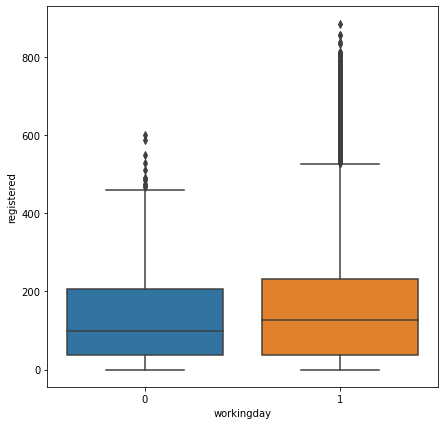

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data, x = 'workingday', y = 'registered')
plt.show()

In [ ]:
data3 = data.loc[data['workingday'] == 1]['registered'].reset_index()
data3.drop(['index'], axis = 1, inplace= True)
data3.T

0     1     2     3     4     5     6     7     8     9     ...  \
registered     5     2     1     3    30    63   153    81    33    41  ...   

            7402  7403  7404  7405  7406  7407  7408  7409  7410  7411  
registered   185   209   297   536   546   329   231   164   117    84  

[1 rows x 7412 columns]

In [ ]:
data4 = data.loc[data['workingday'] == 0]['registered'].reset_index()
data4.drop(['index'], axis = 1, inplace= True)
data4.T

0     1     2     3     4     5     6     7     8     9     ...  \
registered    13    32    27    10     1     1     0     2     7     6  ...   

            3464  3465  3466  3467  3468  3469  3470  3471  3472  3473  
registered   260   292   334   214    99    99   108    92    83    29  

[1 rows x 3474 columns]

In [ ]:
data3.describe().T

count        mean         std  min   25%    50%    75%    max
registered  7412.0  167.904209  165.817966  0.0  36.0  127.0  233.0  886.0

In [ ]:
data4.describe().T

count       mean        std  min   25%   50%    75%    max
registered  3474.0  129.19833  108.65734  0.0  36.0  99.0  207.0  601.0

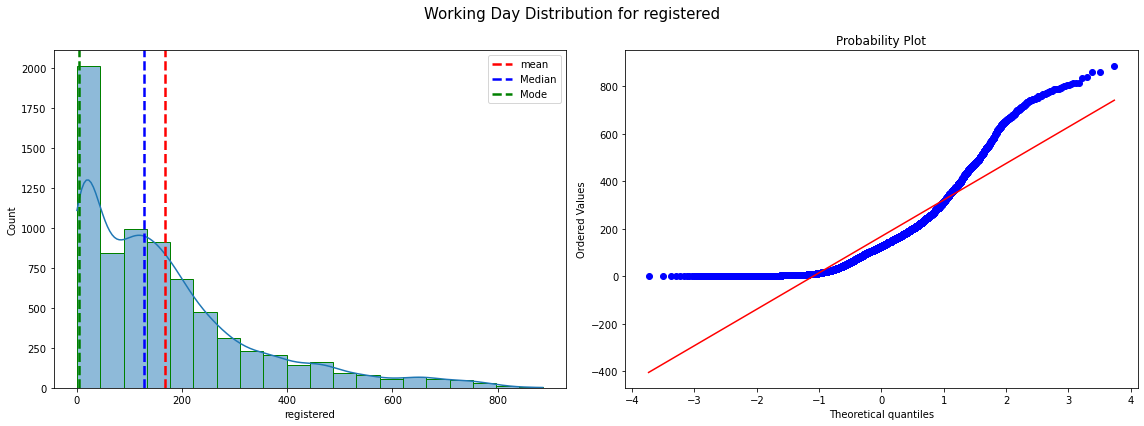

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Working Day Distribution for registered", fontsize = 15)
g1 = sns.histplot(data3['registered'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data3['registered'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data3['registered'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data3['registered'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data3['registered'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

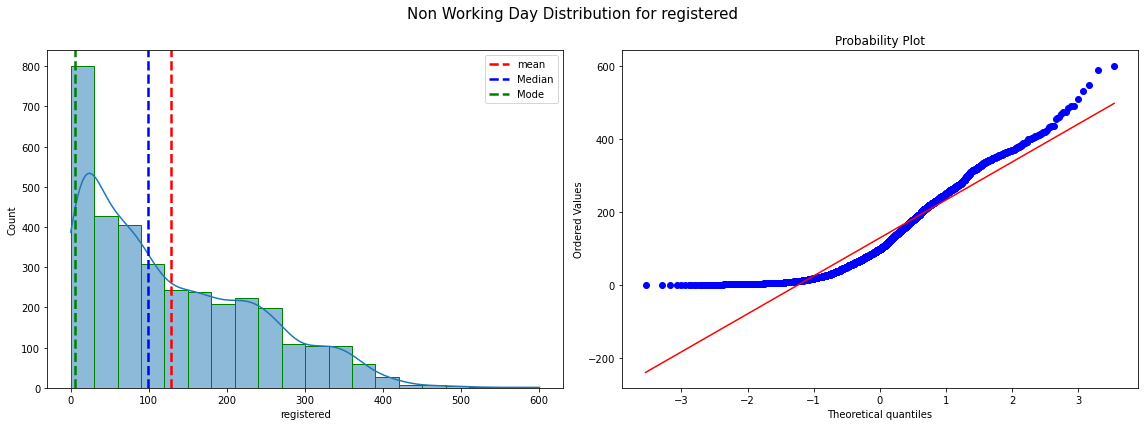

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Non Working Day Distribution for registered", fontsize = 15)
g1 = sns.histplot(data4['registered'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data4['registered'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data4['registered'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data4['registered'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data4['registered'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(data3['registered'])

ShapiroResult(statistic=0.8527053594589233, pvalue=0.0)

In [ ]:
SharpioWilkTestNormality(data4['registered'])

ShapiroResult(statistic=0.914335310459137, pvalue=1.5023040576333499e-40)

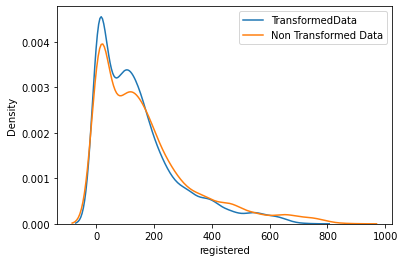

In [ ]:
transformed_data = special.boxcox(data3['registered'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data3['registered'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8624635934829712, pvalue=0.0)

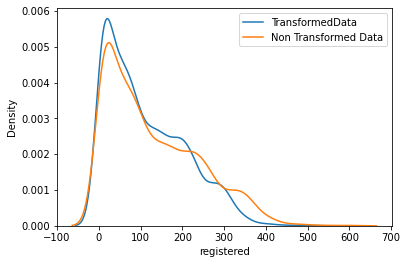

In [ ]:
transformed_data = special.boxcox(data4['registered'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data4['registered'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9195098876953125, pvalue=1.2831760102745566e-39)

In [ ]:
print(np.var(data3), np.var(data4))

registered    27491.888288
dtype: float64 registered    11803.019099
dtype: float64


The ratio of the larger sample variance to the smaller sample variance is 27491.88 / 11803.01 = 2.329, which is less than 4. This means we can assume that the population variances are equal.

In [ ]:
stats.ttest_ind(a=data3, b=data4, equal_var=True)

Ttest_indResult(statistic=array([12.552707]), pvalue=array([6.80649372e-36]))

statistic= 12.552707, pvalue= 6.80649372e-36

The two hypotheses for this particular Register Users on Working and Non Working Days two sample t-test are as follows:
H0: µ1 = µ2 (the two population means are equal)
HA: µ1 ≠µ2 (the two population means are not equal)
Because the p-value of our test (6.80 * 10^(-36) is less than alpha = 0.05, we reject the null hypothesis of the test.
So we can conclude that mean of Registered users on working and Non working days are different

### Working Day and Casual Rented bikes analysis

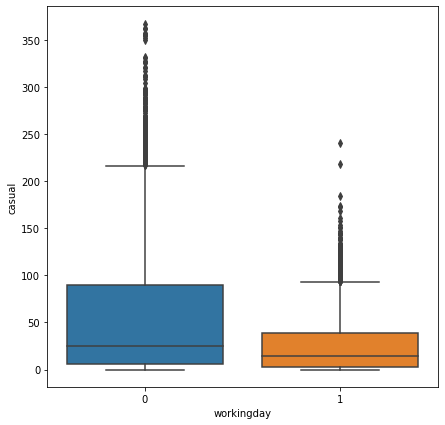

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data, x = 'workingday', y = 'casual')
plt.show()

In [ ]:
data5 = data.loc[data['workingday'] == 1]['casual'].reset_index()
data5.drop(['index'], axis = 1, inplace= True)
data5.T

0     1     2     3     4     5     6     7     8     9     ...  7402  \
casual     0     0     0     0     0     1     1     7    11    10  ...    33   

        7403  7404  7405  7406  7407  7408  7409  7410  7411  
casual    28    37    26    23     7    10     4    12     4  

[1 rows x 7412 columns]

In [ ]:
data6 = data.loc[data['workingday'] == 0]['casual'].reset_index()
data6.drop(['index'], axis = 1, inplace= True)
data6.T

0     1     2     3     4     5     6     7     8     9     ...  3464  \
casual     3     8     5     3     0     0     2     1     1     8  ...    50   

        3465  3466  3467  3468  3469  3470  3471  3472  3473  
casual    46    66    29     8    10    14    14     6     4  

[1 rows x 3474 columns]

In [ ]:
data5.describe().T

count       mean        std  min  25%   50%   75%    max
casual  7412.0  25.107663  28.601591  0.0  3.0  14.0  39.0  240.0

In [ ]:
data6.describe().T

count      mean        std  min  25%   50%   75%    max
casual  3474.0  59.30829  72.669078  0.0  6.0  25.0  90.0  367.0

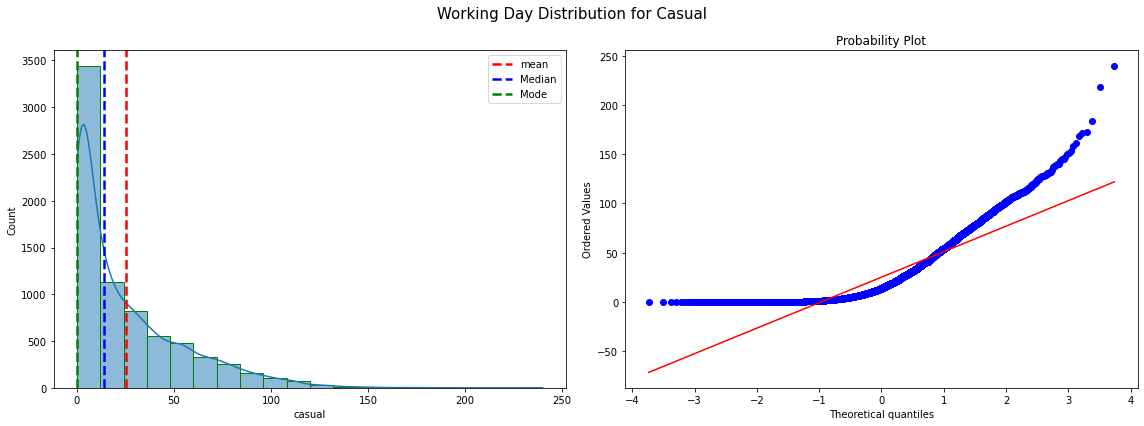

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Working Day Distribution for Casual", fontsize = 15)
g1 = sns.histplot(data5['casual'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data5['casual'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data5['casual'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data5['casual'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data5['casual'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

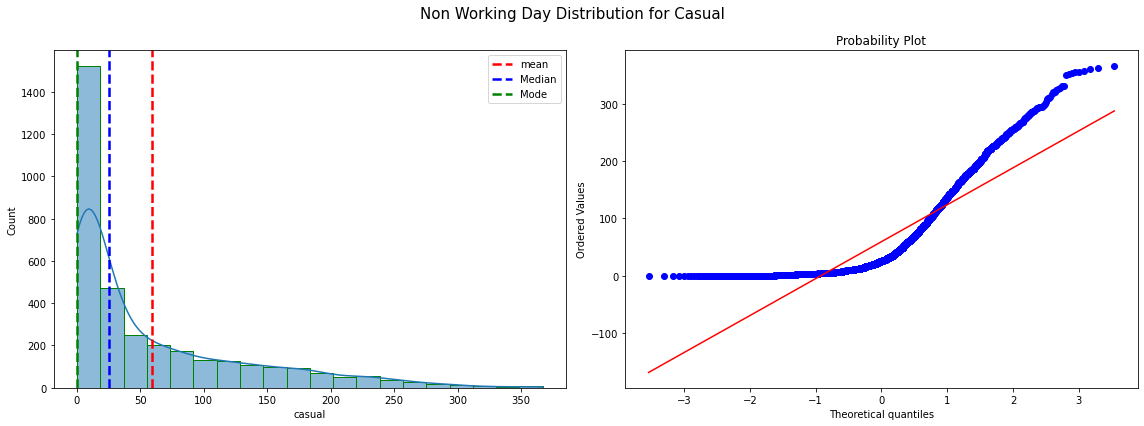

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Non Working Day Distribution for Casual", fontsize = 15)
g1 = sns.histplot(data6['casual'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data6['casual'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data6['casual'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data6['casual'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data6['casual'], dist="norm", plot=axs[0, 1])
plt.tight_layout()

In [ ]:
SharpioWilkTestNormality(data5['casual'])

ShapiroResult(statistic=0.8198105692863464, pvalue=0.0)

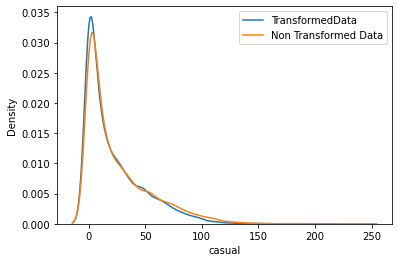

In [ ]:
transformed_data = special.boxcox(data5['casual'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data5['casual'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8293101787567139, pvalue=0.0)

In [ ]:
SharpioWilkTestNormality(data6['casual'])

ShapiroResult(statistic=0.7868186831474304, pvalue=0.0)

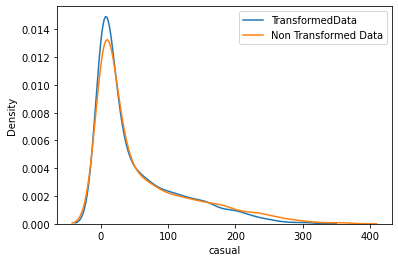

In [ ]:
transformed_data = special.boxcox(data6['casual'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(data6['casual'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.7955233454704285, pvalue=0.0)

In [ ]:
print(np.var(data5), np.var(data6))

casual    817.940648
dtype: float64 casual    5279.274848
dtype: float64


The ratio of the larger sample variance to the smaller sample variance is 5279.27 / 817.94 = 6.461, which is greater than 4. So  So, we can apply Welch’s t-test.

In [ ]:
stats.ttest_ind(data5, data6, equal_var = False)

Ttest_indResult(statistic=array([-26.78422659]), pvalue=array([1.83996688e-145]))

The test statistic turns out to be -26.78 and the corresponding p-value is 1.83996688e-145. Here the p-value is less than 0.05 hence we could reject the null hypothesis of the test and the conclusion that the difference between the mean count of Working and Non Working Casual Customers is quite significant.

### Weather and Total Rented Bikes Analysis

In [ ]:
data.groupby('weather')['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

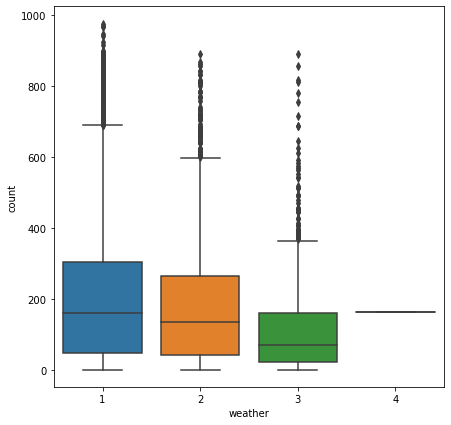

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data, x = 'weather', y = 'count')
plt.show()

In [ ]:
group1 = data.loc[data['weather'] == 1]['count'].reset_index()
group1.drop(['index'], axis = 1, inplace= True)
group1.T

0     1     2     3     4     5     6     7     8     9     ...  7182  \
count    16    40    32    13     1     2     3     8    14    36  ...   218   

       7183  7184  7185  7186  7187  7188  7189  7190  7191  
count   237   334   562   569   336   241   168   129    88  

[1 rows x 7192 columns]

In [ ]:
group2 = data.loc[data['weather'] == 2]['count'].reset_index()
group2.drop(['index'], axis = 1, inplace= True)
group2.T

0     1     2     3     4     5     6     7     8     9     ...  2824  \
count     1    94   106   110    93    67    36    34    28    39  ...   211   

       2825  2826  2827  2828  2829  2830  2831  2832  2833  
count   495   507   340   200   120    54    18    15     7  

[1 rows x 2834 columns]

In [ ]:
group3 = data.loc[data['weather'] == 3]['count'].reset_index()
group3.drop(['index'], axis = 1, inplace= True)
group3.T

0    1    2    3    4    5    6    7    8    9    ...  849  850  851  \
count   35   37    2    8   59   74   76    5    7    1  ...  220   31    3   

       852  853  854  855  856  857  858  
count   41   96  107    5  302   47  313  

[1 rows x 859 columns]

In [ ]:
group4 = data.loc[data['weather'] == 4]['count'].reset_index()
group4.drop(['index'], axis = 1, inplace= True)
group4.T

0
count  164

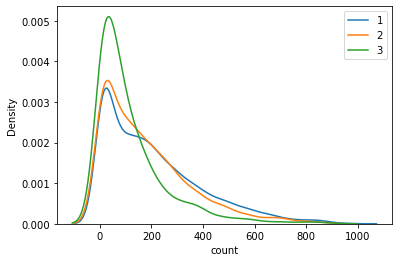

In [ ]:
sns.kdeplot(group1['count'], label= "1")
sns.kdeplot(group2['count'], label= "2")
sns.kdeplot(group3['count'], label= "3")
sns.kdeplot(group4['count'], label= "4")
plt.legend()

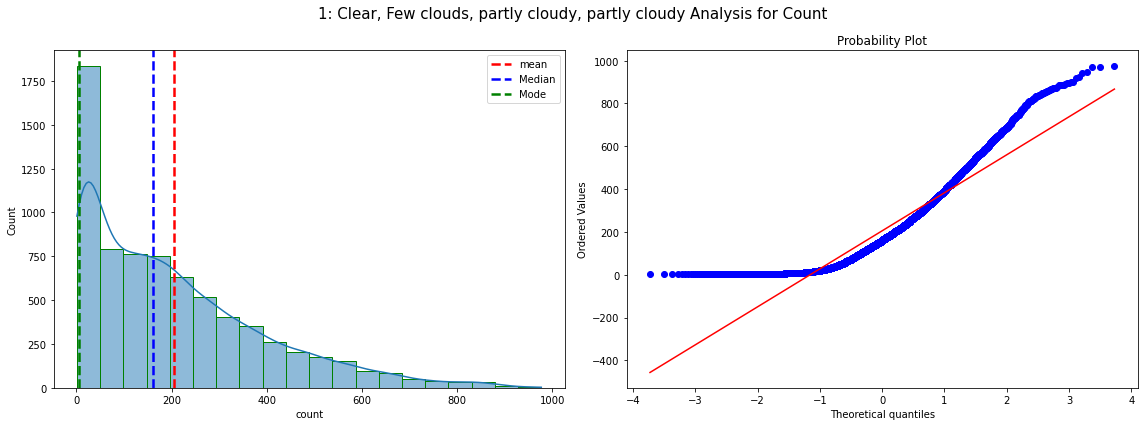

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("1: Clear, Few clouds, partly cloudy, partly cloudy Analysis for Count", fontsize = 15)
g1 = sns.histplot(group1['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(group1['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group1['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group1['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group1['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

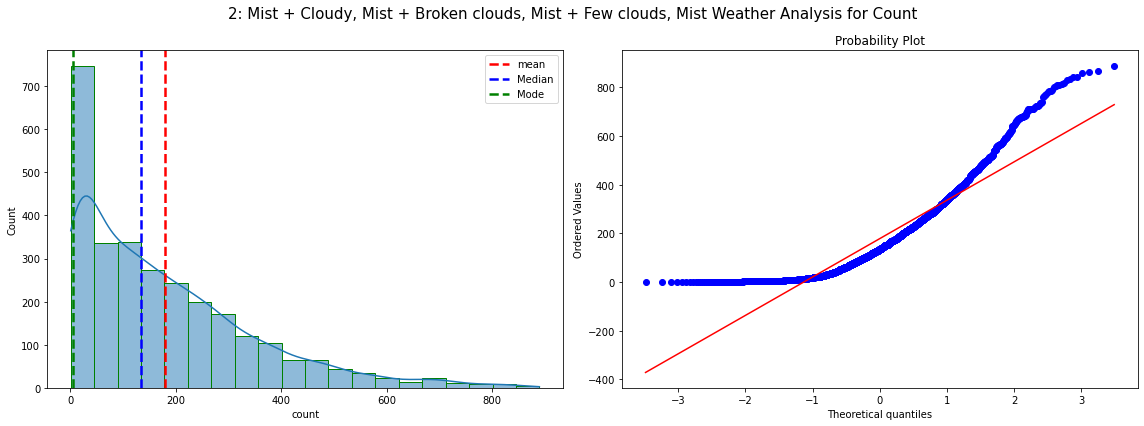

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist Weather Analysis for Count", fontsize = 15)
g1 = sns.histplot(group2['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(group2['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group2['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group2['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group2['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

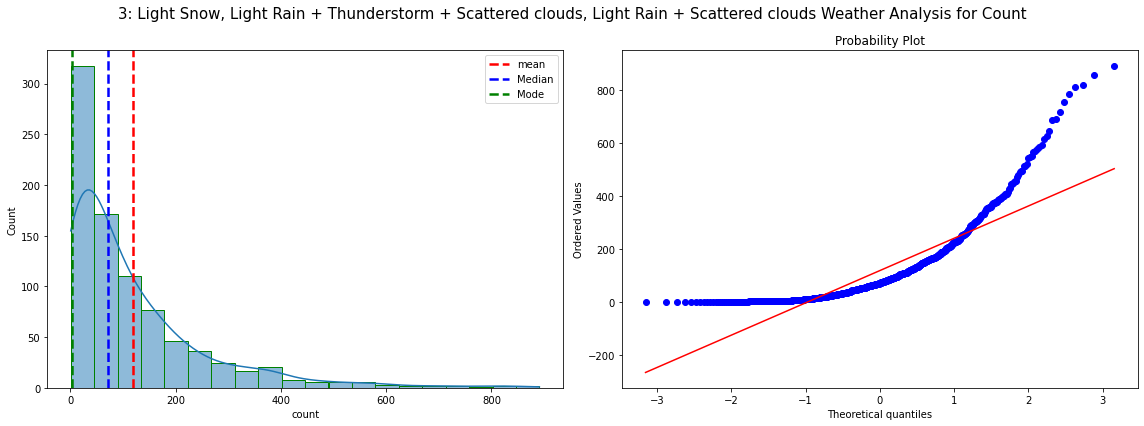

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds Weather Analysis for Count", fontsize = 15)
g1 = sns.histplot(group3['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(group3['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group3['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group3['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group3['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

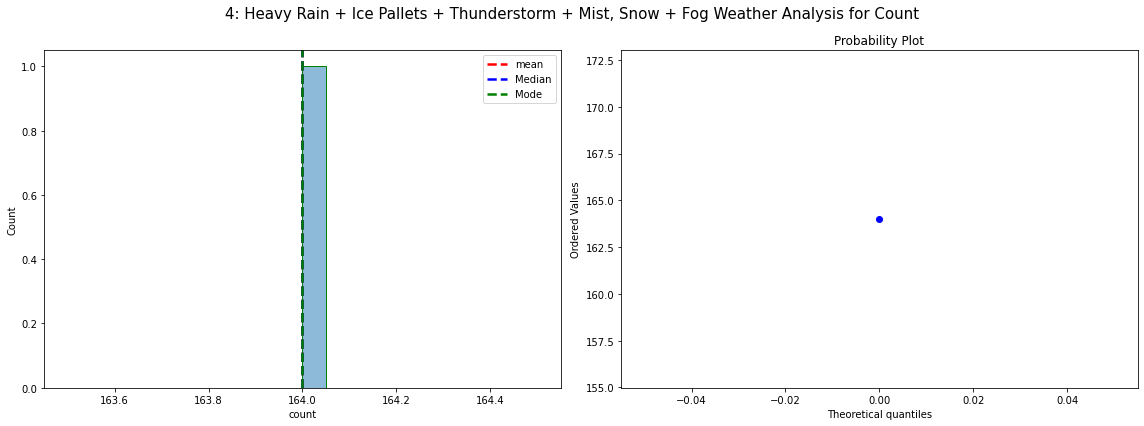

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog Weather Analysis for Count", fontsize = 15)
g1 = sns.histplot(group4['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(group4['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group4['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group4['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group4['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(group1['count'])

ShapiroResult(statistic=0.8909225463867188, pvalue=0.0)

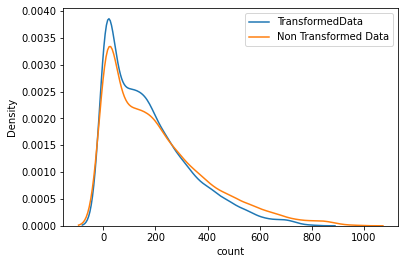

In [ ]:
transformed_data = special.boxcox(group1['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(group1['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8984367251396179, pvalue=0.0)

In [ ]:
SharpioWilkTestNormality(group2['count'])

ShapiroResult(statistic=0.8767688274383545, pvalue=9.781063280987223e-43)

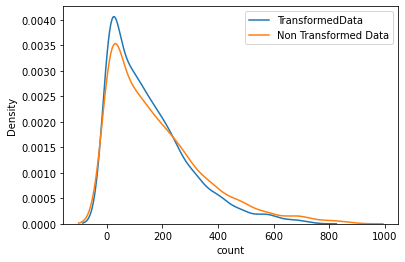

In [ ]:
transformed_data = special.boxcox(group2['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(group2['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8852203488349915, pvalue=1.1846577217402004e-41)

In [ ]:
SharpioWilkTestNormality(group3['count'])

ShapiroResult(statistic=0.7674333453178406, pvalue=3.876134581802921e-33)

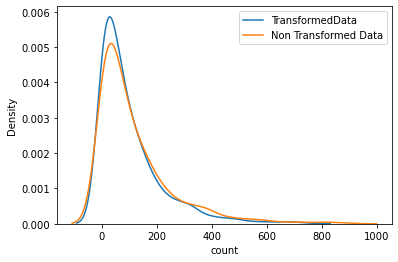

In [ ]:
transformed_data = special.boxcox(group3['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(group3['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.7805486917495728, pvalue=2.1358254809860942e-32)

In [ ]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=array([65.53024113]), pvalue=array([5.48206948e-42]))

In [ ]:
#Levene's test centered at the median
stats.levene(group1['count'], group2['count'], group3['count'], group4['count'], center='median')

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [ ]:
stats.levene(group1['count'], group2['count'], group3['count'], group4['count'], center='mean')

LeveneResult(statistic=61.54638448949361, pvalue=1.889180918625458e-39)

In both methods, the p-value is less than .05. This means in both cases we would reject the null hypothesis.

So we can conclude here that for Total count Population mean in different weathers are not same

# Anova for Season

In [ ]:
data.groupby('season')['count'].sum()

season
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64

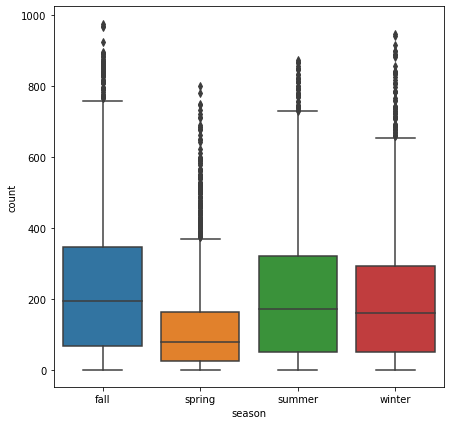

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data, x = 'season', y = 'count')
plt.show()

In [ ]:
fall = data.loc[data['season'] == "fall"]['count'].reset_index()
fall.drop(['index'], axis = 1, inplace= True)
fall.T

0     1     2     3     4     5     6     7     8     9     ...  2723  \
count    68    31    13    11     6    30   108   243   492   260  ...   286   

       2724  2725  2726  2727  2728  2729  2730  2731  2732  
count   311   466   886   892   611   409   349   229   123  

[1 rows x 2733 columns]

In [ ]:
spring = data.loc[data['season'] == "spring"]['count'].reset_index()
spring.drop(['index'], axis = 1, inplace= True)
spring.T

0     1     2     3     4     5     6     7     8     9     ...  2676  \
count    16    40    32    13     1     1     2     3     8    14  ...   260   

       2677  2678  2679  2680  2681  2682  2683  2684  2685  
count   286   385   721   801   549   330   223   148    54  

[1 rows x 2686 columns]

In [ ]:
summer = data.loc[data['season'] == "summer"]['count'].reset_index()
summer.drop(['index'], axis = 1, inplace= True)
summer.T

0     1     2     3     4     5     6     7     8     9     ...  2723  \
count     6     4     7     4     3    12    28    95   206   173  ...   227   

       2724  2725  2726  2727  2728  2729  2730  2731  2732  
count   259   334   811   795   514   458   276   291   125  

[1 rows x 2733 columns]

In [ ]:
winter = data.loc[data['season'] == "winter"]['count'].reset_index()
winter.drop(['index'], axis = 1, inplace= True)
winter.T

0     1     2     3     4     5     6     7     8     9     ...  2724  \
count   130    58    67    25     8     5    19    36    67   129  ...   218   

       2725  2726  2727  2728  2729  2730  2731  2732  2733  
count   237   334   562   569   336   241   168   129    88  

[1 rows x 2734 columns]

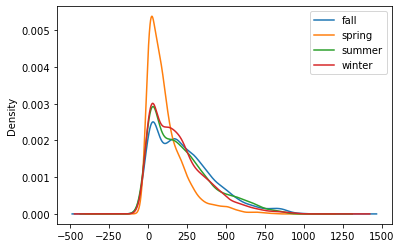

In [ ]:
data.groupby('season')['count'].plot(kind='kde')
plt.legend()
plt.show()

In [ ]:
fallD = fall.describe().T
springD = spring.describe().T
summerD = summer.describe().T
winterD = winter.describe().T

print("Fall Describe")
print(fallD)
print("Spring Describe")
print(springD)
print("Summer Describe")
print(summerD)
print("Winter Describe")
print(winterD)

Fall Describe
        count        mean         std  min   25%    50%    75%    max
count  2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
Spring Describe
        count        mean         std  min   25%   50%    75%    max
count  2686.0  116.343261  125.273974  1.0  24.0  78.0  164.0  801.0
Summer Describe
        count        mean         std  min   25%    50%    75%    max
count  2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
Winter Describe
        count        mean         std  min   25%    50%    75%    max
count  2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0


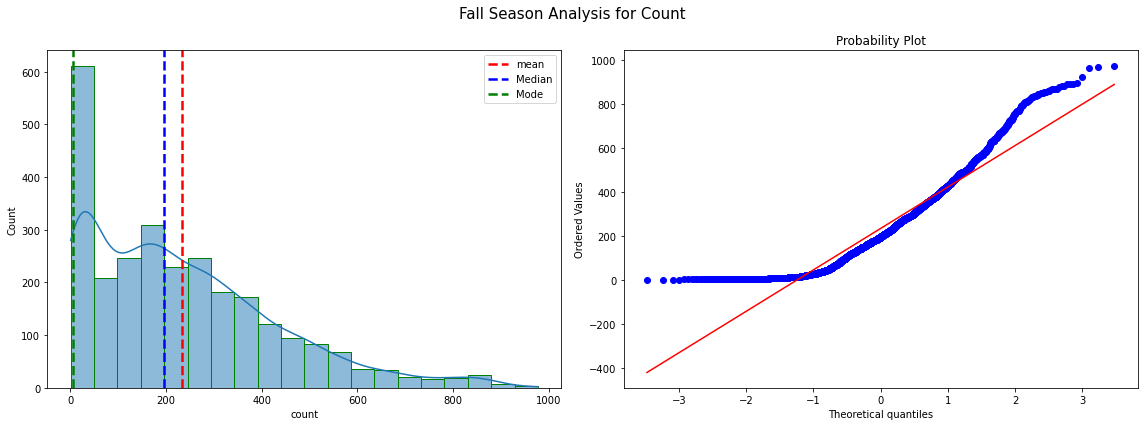

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("Fall Season Analysis for Count", fontsize = 15)
g1 = sns.histplot(fall['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(fall['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(fall['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(fall['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(fall['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

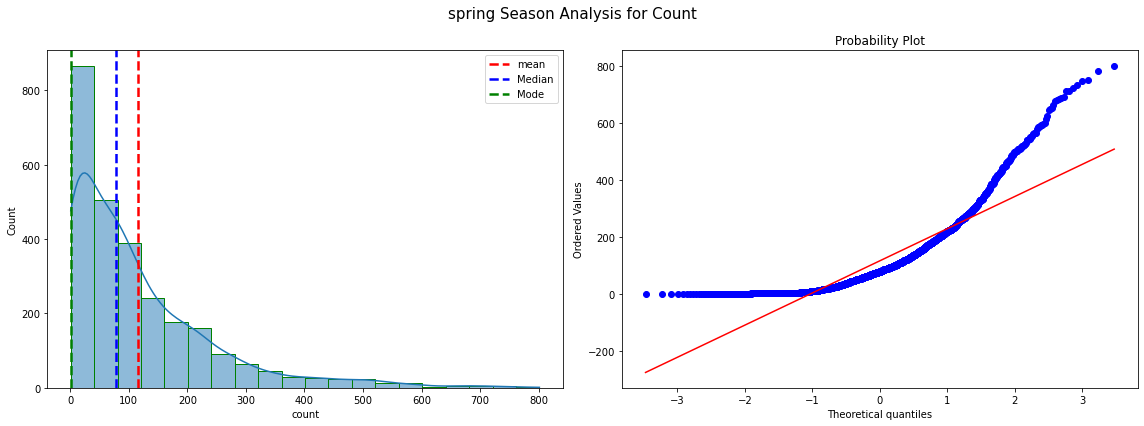

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("spring Season Analysis for Count", fontsize = 15)
g1 = sns.histplot(spring['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(spring['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(spring['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(spring['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(spring['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

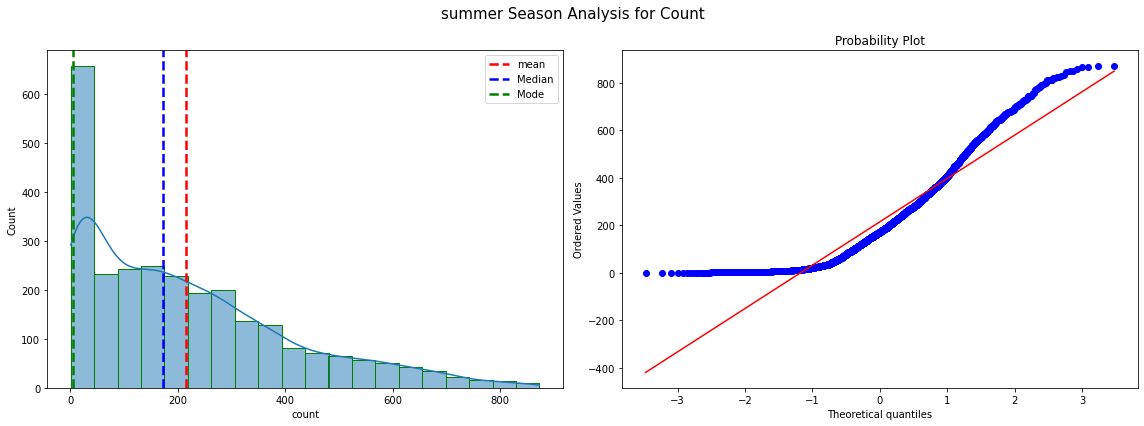

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("summer Season Analysis for Count", fontsize = 15)
g1 = sns.histplot(summer['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(summer['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(summer['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(summer['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(summer['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

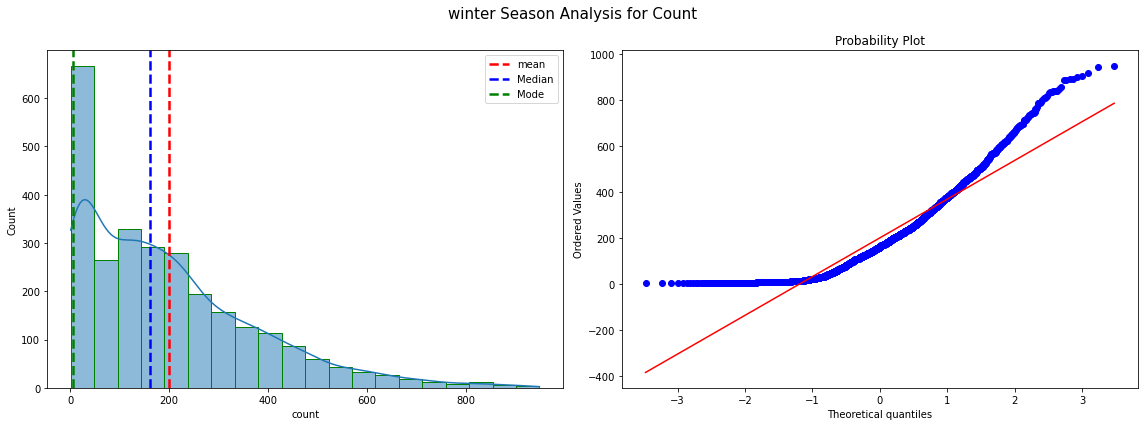

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6),  squeeze=False)
plt.suptitle("winter Season Analysis for Count", fontsize = 15)
g1 = sns.histplot(winter['count'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(winter['count'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(winter['count'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(winter['count'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(winter['count'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
SharpioWilkTestNormality(fall['count'])

ShapiroResult(statistic=0.9148167371749878, pvalue=1.0437229694698105e-36)

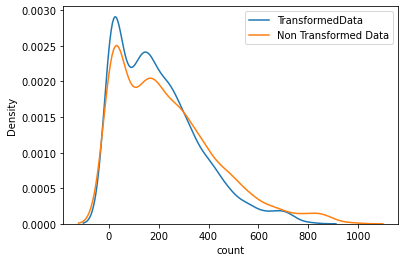

In [ ]:
transformed_data = stats.boxcox(fall['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(fall['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9213037490844727, pvalue=1.3538239610929808e-35)

In [ ]:
SharpioWilkTestNormality(spring['count'])

ShapiroResult(statistic=0.8087379336357117, pvalue=0.0)

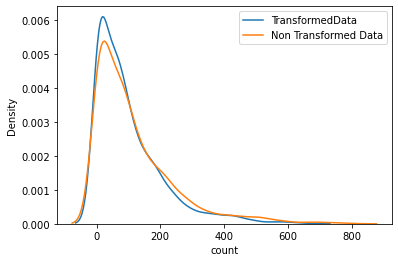

In [ ]:
transformed_data = stats.boxcox(spring['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(spring['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.8207166194915771, pvalue=0.0)

In [ ]:
SharpioWilkTestNormality(summer['count'])

ShapiroResult(statistic=0.9004815220832825, pvalue=6.038716365804366e-39)

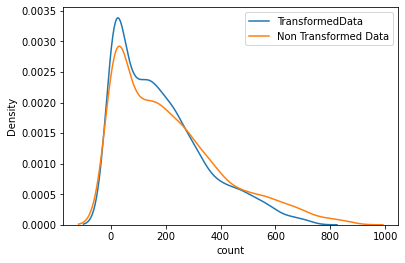

In [ ]:
transformed_data = stats.boxcox(summer['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(summer['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9071146249771118, pvalue=6.050719327930386e-38)

In [ ]:
SharpioWilkTestNormality(winter['count'])

ShapiroResult(statistic=0.8954642415046692, pvalue=1.130082751748606e-39)

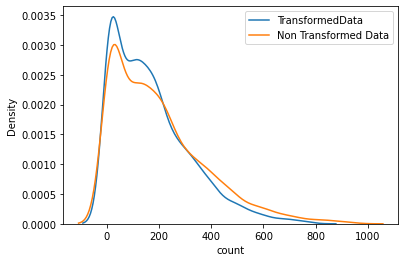

In [ ]:
transformed_data = stats.boxcox(winter['count'], best_lambda)
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(winter['count'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [ ]:
SharpioWilkTestNormality(transformed_data)

ShapiroResult(statistic=0.9031305313110352, pvalue=1.4732827460476436e-38)

In [ ]:
stats.f_oneway(fall, spring, summer, winter)

F_onewayResult(statistic=array([236.94671081]), pvalue=array([6.16484339e-149]))

A one-way ANOVA uses the following null and alternative hypotheses:
H0 (null hypothesis): μfall = μspring = μsummer = μwinter (all the population means are equal for different weathers)
H1 (Alternate hypothesis): at least one population mean is different from the rest

The F test statistic is 236.94 and the corresponding p-value is 6.16484339e-149. Since the p-value is less than .05, we reject the null hypothesis.

So we can conclude here that for Total count Population mean in different seasons are not same

Let's try it using levene’s test

In [ ]:
#Levene's test centered at the median
stats.levene(fall['count'], spring['count'], summer['count'], winter['count'], center='median')

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [ ]:
#Levene's test centered at the mean
stats.levene(fall['count'], spring['count'], summer['count'], winter['count'], center='mean')

LeveneResult(statistic=212.51051133288894, pvalue=5.725941205064937e-134)

In both methods, the p-value is less than .05. This means in both cases we would reject the null hypothesis.

So we can conclude here that for Total count Population mean in different weathers are not same

### Chi Square Test to check Independence of Weather and Season

Chi Square Test to check independence

In [ ]:
table = pd.crosstab(data["weather"],data["season"])
print('contingency_table :\n',table)

contingency_table :
 season   fall  spring  summer  winter
weather                              
1        1930    1759    1801    1702
2         604     715     708     807
3         199     211     224     225
4           0       1       0       0


In [ ]:
stat, p, dof, expected = stats.chi2_contingency(table)

In [ ]:
p

1.5499250736864862e-07

p < 0.05

so we reject the null hypothesis and we can say that there is relationship between Weather and Season and they are dependent

In [ ]:
stat

49.15865559689363

In [ ]:
dof

9

In [ ]:
expected

array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01]])

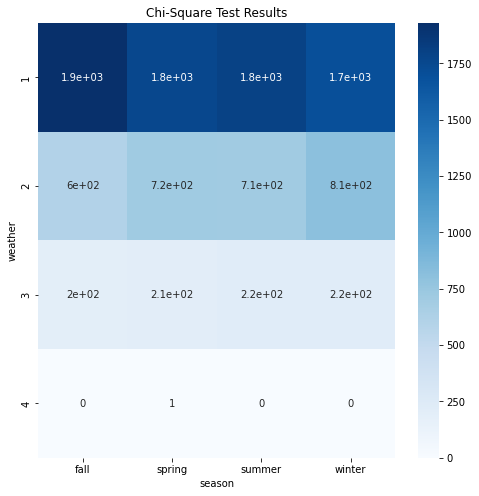

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(table, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

## Inferences